
# CSCI S-108: Data Mining, Discovery, and Exploration
## Final Project: Optimizing Data Egress for Secure Transmission Using Data Mining Techniques
**Student**: Luciano Carvalho

### 1. Introduction


#### Objective
The primary objective of this project is to develop a secure, efficient method for data egress by leveraging advanced data mining techniques. This includes obfuscating sensitive information and reducing dataset sizes before transmission, ensuring that data can be transmitted securely and efficiently across various platforms.

#### Background
In my role as Director of DevOps at Intelex Technologies, I oversee the management of our company's databases and the secure handling of data, especially when it comes to exporting large volumes of information. This project is a direct response to the increasing need for robust data security measures and efficient data transmission strategies. Given the volume and sensitivity of the data handled, especially in cross-platform environments like AWS, Azure, and Rackspace, this project is crucial for maintaining data integrity and operational efficiency.

#### Dataset
The project utilizes the UNSW-NB15 dataset, a comprehensive collection of network traffic data comprising 700,000 records and 49 features. The dataset includes various network attributes such as IP addresses, port numbers, and protocols, along with labels identifying both normal and malicious traffic, providing a solid foundation for the data mining tasks at hand.


### 2. Problem Statement

The project addresses significant challenges in the secure obfuscation and reduction of data size during transmission. These challenges are critical for ensuring the secure handling of large-scale data exports. Additionally, the project aims to enhance operational efficiency in monitoring and managing deployments across diverse platforms, including AWS, Azure, and Rackspace. The lack of robust solutions in these areas has necessitated the exploration of advanced data mining techniques to fulfill these needs.


### 3. Exploratory Data Analysis (EDA)

In this project, a thorough Exploratory Data Analysis (EDA) was conducted to gain a deep understanding of the UNSW-NB15 dataset. The EDA involved comprehensive statistical analyses, including the distribution of key features, correlation matrices, and the identification of outliers. Various visualizations, such as histograms, scatter plots, and box plots, were utilized to reveal underlying patterns and anomalies in the data. This rigorous analysis provided valuable insights into the dataset's structure and informed the subsequent steps in data preprocessing and modeling

#### 3.1 Data Loading and Description
This section covers the initial data loading, examination of data structure, and basic statistical description.

In [44]:
!pip install umap
!pip install umap-learn
!pip install scikit-learn-extra

In [97]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import umap
import warnings
import zipfile

from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix, pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import unique_labels
from time import time

# Suppress all warnings
warnings.filterwarnings("ignore")

In [46]:
# Unzip the archive
zip_path = '/content/UNSW-NB15-archive.zip'
extract_path = '/content/UNSW-NB15-archive'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print(extracted_files)

['UNSW-NB15_LIST_EVENTS.csv', 'NUSW-NB15_features.csv', 'UNSW_NB15_training-set.csv', 'UNSW_NB15_testing-set.csv', 'UNSW-NB15_4.csv', 'UNSW-NB15_2.csv', 'UNSW-NB15_3.csv', 'UNSW-NB15_1.csv']


In [47]:
# Load the NUSW-NB15_features.csv file to get column names and types
features_path = os.path.join(extract_path, 'NUSW-NB15_features.csv')
features_df = pd.read_csv(features_path, encoding='ISO-8859-1')

# Inspect the columns in features_df
print("\nColumns in features_df:")
print(features_df.columns)


Columns in features_df:
Index(['No.', 'Name', 'Type ', 'Description'], dtype='object')


In [48]:
# There are typos in the column names. Rename columns to match expected names
features_df.columns = ['No', 'Name', 'Type', 'Description']

# Print the features DataFrame
print("\nFeatures DataFrame:")
features_df


Features DataFrame:


No              Name       Type  \
0    1             srcip    nominal   
1    2             sport    integer   
2    3             dstip    nominal   
3    4            dsport    integer   
4    5             proto    nominal   
5    6             state    nominal   
6    7               dur      Float   
7    8            sbytes    Integer   
8    9            dbytes    Integer   
9   10              sttl    Integer   
10  11              dttl    Integer   
11  12             sloss    Integer   
12  13             dloss    Integer   
13  14           service    nominal   
14  15             Sload      Float   
15  16             Dload      Float   
16  17             Spkts    integer   
17  18             Dpkts    integer   
18  19              swin    integer   
19  20              dwin    integer   
20  21             stcpb    integer   
21  22             dtcpb    integer   
22  23           smeansz    integer   
23  24           dmeansz    integer   
24  25       trans_depth    integer   
25  26       res_bdy_len    integer   
26  27              Sjit      Float   
27  28              Djit      Float   
28  29             Stime  Timestamp   
29  30             Ltime  Timestamp   
30  31           Sintpkt      Float   
31  32           Dintpkt      Float   
32  33            tcprtt      Float   
33  34            synack      Float   
34  35            ackdat      Float   
35  36   is_sm_ips_ports     Binary   
36  37      ct_state_ttl    Integer   
37  38  ct_flw_http_mthd    Integer   
38  39      is_ftp_login     Binary   
39  40        ct_ftp_cmd    integer   
40  41        ct_srv_src    integer   
41  42        ct_srv_dst    integer   
42  43        ct_dst_ltm    integer   
43  44       ct_src_ ltm    integer   
44  45  ct_src_dport_ltm    integer   
45  46  ct_dst_sport_ltm    integer   
46  47    ct_dst_src_ltm    integer   
47  48        attack_cat    nominal   
48  49             Label     binary   

                                          Description  
0                                   Source IP address  
1                                  Source port number  
2                              Destination IP address  
3                             Destination port number  
4                                Transaction protocol  
5   Indicates to the state and its dependent proto...  
6                               Record total duration  
7            Source to destination transaction bytes   
8             Destination to source transaction bytes  
9           Source to destination time to live value   
10           Destination to source time to live value  
11           Source packets retransmitted or dropped   
12       Destination packets retransmitted or dropped  
13  http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...  
14                             Source bits per second  
15                        Destination bits per second  
16                Source to destination packet count   
17                 Destination to source packet count  
18              Source TCP window advertisement value  
19         Destination TCP window advertisement value  
20                    Source TCP base sequence number  
21               Destination TCP base sequence number  
22  Mean of the ?ow packet size transmitted by the...  
23  Mean of the ?ow packet size transmitted by the...  
24  Represents the pipelined depth into the connec...  
25  Actual uncompressed content size of the data t...  
26                               Source jitter (mSec)  
27                          Destination jitter (mSec)  
28                                  record start time  
29                                   record last time  
30             Source interpacket arrival time (mSec)  
31        Destination interpacket arrival time (mSec)  
32  TCP connection setup round-trip time, the sum ...  
33  TCP connection setup time, the time between th...  
34  TCP connection setup time, the time between th...  
35  If source (1) and destination (3)

In [49]:
# Extract column names and types
column_names = features_df['Name'].values
column_types = features_df['Type'].values

# Print column names and types
print("Column Names:")
print(column_names)
print("\nColumn Types:")
print(column_types)

Column Names:
['srcip' 'sport' 'dstip' 'dsport' 'proto' 'state' 'dur' 'sbytes' 'dbytes'
 'sttl' 'dttl' 'sloss' 'dloss' 'service' 'Sload' 'Dload' 'Spkts' 'Dpkts'
 'swin' 'dwin' 'stcpb' 'dtcpb' 'smeansz' 'dmeansz' 'trans_depth'
 'res_bdy_len' 'Sjit' 'Djit' 'Stime' 'Ltime' 'Sintpkt' 'Dintpkt' 'tcprtt'
 'synack' 'ackdat' 'is_sm_ips_ports' 'ct_state_ttl' 'ct_flw_http_mthd'
 'is_ftp_login' 'ct_ftp_cmd' 'ct_srv_src' 'ct_srv_dst' 'ct_dst_ltm'
 'ct_src_ ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm' 'ct_dst_src_ltm'
 'attack_cat' 'Label']

Column Types:
['nominal' 'integer' 'nominal' 'integer' 'nominal' 'nominal' 'Float'
 'Integer' 'Integer' 'Integer' 'Integer' 'Integer' 'Integer' 'nominal'
 'Float' 'Float' 'integer' 'integer' 'integer' 'integer' 'integer'
 'integer' 'integer' 'integer' 'integer' 'integer' 'Float' 'Float'
 'Timestamp' 'Timestamp' 'Float' 'Float' 'Float' 'Float' 'Float' 'Binary'
 'Integer' 'Integer' 'Binary' 'integer' 'integer' 'integer' 'integer'
 'integer' 'integer' 'integer' 'int

In [50]:
# Load the UNSW-NB15_1.csv file into a pandas DataFrame with the appropriate encoding and column names
file_path = os.path.join(extract_path, 'UNSW-NB15_1.csv')
df_original = pd.read_csv(file_path, encoding='ISO-8859-1', names=column_names, skiprows=1)

# Display the first few rows of the DataFrame and summary statistics
df_original.head()


srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
1  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
2  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
3  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   
4  59.166.0.0  32119  149.171.126.9    111   udp   CON  0.078339     568   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     304    31  ...           0           2           4          2   
1     178    31  ...           0          12           8          1   
2     164    31  ...           0           6           9          1   
3     178    31  ...           0           7           9          1   
4     312    31  ...           0           2           4          2   

   ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0            3                 1                 1               2   
1            2                 2                 1               1   
2            1                 1                 1               1   
3            1                 1                 1               1   
4            3                 1                 1               2   

   attack_cat  Label  
0         NaN      0  
1         NaN      0  
2         NaN      0  
3         NaN      0  
4         NaN      0  

[5 rows x 49 columns]

In [51]:
# Print the unique values of the nominal features

unique_attack_cat = df_original['attack_cat'].unique()
print("Unique values in 'attack_cat':", unique_attack_cat)

unique_proto = df_original['proto'].unique()
print("Unique values in 'proto':", unique_proto)

unique_state = df_original['state'].unique()
print("Unique values in 'state':", unique_state)

unique_service = df_original['service'].unique()
print("Unique values in 'service':", unique_service)

unique_Label = df_original['Label'].unique()
print("Unique values in 'Label':", unique_Label)

Unique values in 'attack_cat': [nan 'Exploits' 'Reconnaissance' 'DoS' 'Generic' 'Shellcode' ' Fuzzers'
 'Worms' 'Backdoors' 'Analysis']
Unique values in 'proto': ['udp' 'arp' 'tcp' 'ospf' 'icmp' 'igmp' 'sctp' 'udt' 'sep' 'sun-nd'
 'swipe' 'mobile' 'pim' 'rtp' 'ipnip' 'ip' 'ggp' 'st2' 'egp' 'cbt' 'emcon'
 'nvp' 'igp' 'xnet' 'argus' 'bbn-rcc' 'chaos' 'pup' 'hmp' 'mux' 'dcn'
 'prm' 'trunk-1' 'xns-idp' 'trunk-2' 'leaf-1' 'leaf-2' 'irtp' 'rdp'
 'iso-tp4' 'netblt' 'mfe-nsp' 'merit-inp' '3pc' 'xtp' 'idpr' 'tp++' 'ddp'
 'idpr-cmtp' 'ipv6' 'il' 'idrp' 'ipv6-frag' 'sdrp' 'ipv6-route' 'gre'
 'rsvp' 'mhrp' 'bna' 'esp' 'i-nlsp' 'narp' 'ipv6-no' 'tlsp' 'skip'
 'ipv6-opts' 'any' 'cftp' 'sat-expak' 'kryptolan' 'rvd' 'ippc' 'sat-mon'
 'ipcv' 'visa' 'cpnx' 'cphb' 'wsn' 'pvp' 'br-sat-mon' 'wb-mon' 'wb-expak'
 'iso-ip' 'secure-vmtp' 'vmtp' 'vines' 'ttp' 'nsfnet-igp' 'dgp' 'tcf'
 'eigrp' 'sprite-rpc' 'larp' 'mtp' 'ax.25' 'ipip' 'micp' 'aes-sp3-d'
 'encap' 'etherip' 'pri-enc' 'gmtp' 'pnni' 'ifmp' 'aris' 'qn


#### 3.2 Data Cleaning
We handle missing values, convert data types, and perform basic preprocessing to ensure data quality.


In [52]:
# Filter out rows where df['Label'] is 1
df = df_original[df_original['Label'] != 1]

# Filter out rows where df['service'] is '-' or 'dns'
df = df[~df['service'].isin(['-', 'dns'])]

# Print the shape of the dataframes to verify the changes
print("Original Dataframe Shape:", df_original.shape)
print("Filtered Dataframe Shape:", df.shape)


Original Dataframe Shape: (700000, 49)
Filtered Dataframe Shape: (144679, 49)


In [53]:
# Identify numeric columns based on the types
numeric_columns = [column_names[i] for i in range(len(column_types)) if 'integer' in column_types[i] or 'Float' in column_types[i]]
print("Identified numeric columns:", numeric_columns)

# Convert identified numeric columns to numeric dtype, coercing errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
print("\nData types of numeric columns after conversion:")
print(df[numeric_columns].dtypes)

# Show summary statistics before filling missing values
print("\nSummary statistics before handling missing values:")
print(df[numeric_columns].describe(include='all'))

# Handle missing values by filling with the mean for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Count missing values in numeric columns after filling
missing_values_after = df[numeric_columns].isnull().sum()
print("\nMissing values in numeric columns after filling with mean:")
print(missing_values_after)

# Ensure no NaN values are present after filling (as a check)
assert missing_values_after.sum() == 0, "There are still missing values present."

print("\nData preprocessing complete. No missing values in numeric columns.")


Identified numeric columns: ['sport', 'dsport', 'dur', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

Data types of numeric columns after conversion:
sport                 int64
dsport                int64
dur                 float64
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack           


#### 3.3 Data Exploration and Analysis Techniques
We begin with a thorough exploration of the dataset, using techniques like summary statistics, data visualization, and more, as discussed in the "Pitfalls in Data Mining" assignment.



In [54]:
# Summary Statistics for all Numeric Columns only
df_numeric = df[numeric_columns]
summary_stats = df_numeric.describe()

print("Summary Statistics:")
summary_stats

Summary Statistics:


sport         dsport            dur         Sload  \
count  144679.000000  144679.000000  144679.000000  1.446790e+05   
mean    32707.660752    8377.145391       1.093550  1.373321e+06   
std     18884.714976   16810.195546       2.815315  4.398693e+06   
min       867.000000      21.000000       0.000000  0.000000e+00   
25%     16292.000000      25.000000       0.046747  1.152398e+04   
50%     32598.000000      80.000000       0.582466  4.405577e+04   
75%     49055.000000    3424.000000       1.080084  6.449820e+05   
max     65534.000000   65430.000000      59.948132  1.090909e+09   

              Dload          Spkts          Dpkts           swin  \
count  1.446790e+05  144679.000000  144679.000000  144679.000000   
mean   9.739201e+05      44.534756      61.295378     254.996475   
std    2.423998e+06      76.447008     150.501163       0.948093   
min    0.000000e+00       1.000000       0.000000       0.000000   
25%    5.845992e+04      12.000000      12.000000     255.000000   
50%    7.638332e+04      14.000000      18.000000     255.000000   
75%    5.977910e+05      52.000000      42.000000     255.000000   
max    2.201837e+07     642.000000     746.000000     255.000000   

                dwin         stcpb  ...         synack         ackdat  \
count  144679.000000  1.446790e+05  ...  144679.000000  144679.000000   
mean      254.980612  2.143786e+09  ...       0.000621       0.000198   
std         2.223406  1.240005e+09  ...       0.001975       0.001508   
min         0.000000  0.000000e+00  ...       0.000000       0.000000   
25%       255.000000  1.070169e+09  ...       0.000499       0.000132   
50%       255.000000  2.142918e+09  ...       0.000534       0.000139   
75%       255.000000  3.216353e+09  ...       0.000559       0.000155   
max       255.000000  4.294913e+09  ...       0.265345       0.142976   

          ct_ftp_cmd     ct_srv_src     ct_srv_dst     ct_dst_ltm  \
count  144679.000000  144679.000000  144679.000000  144679.000000   
mean        0.149856       2.207632       2.212588       4.042197   
std         0.595919       1.641935       1.613094       3.397266   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.000000       1.000000       1.000000       2.000000   
50%         0.000000       2.000000       2.000000       3.000000   
75%         0.000000       3.000000       3.000000       5.000000   
max         8.000000      35.000000      27.000000      42.000000   

         ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  
count  144679.000000     144679.000000     144679.000000   144679.000000  
mean        4.408808          1.360764          1.244528        2.136184  
std         3.779107          1.443549          1.222282        2.197224  
min         1.000000          1.000000          1.000000        1.000000  
25%         2.000000          1.000000          1.000000        1.000000  
50%         4.000000          1.000000          1.000000        1.000000  
75%         6.000000          1.000000          1.000000        2.000000  
max        44.000000         36.000000         33.000000       33.000000  

[8 rows x 30 columns]

Adjusted columns with the best normal distribution characteristics: ['sport', 'stcpb', 'dtcpb', 'trans_depth']


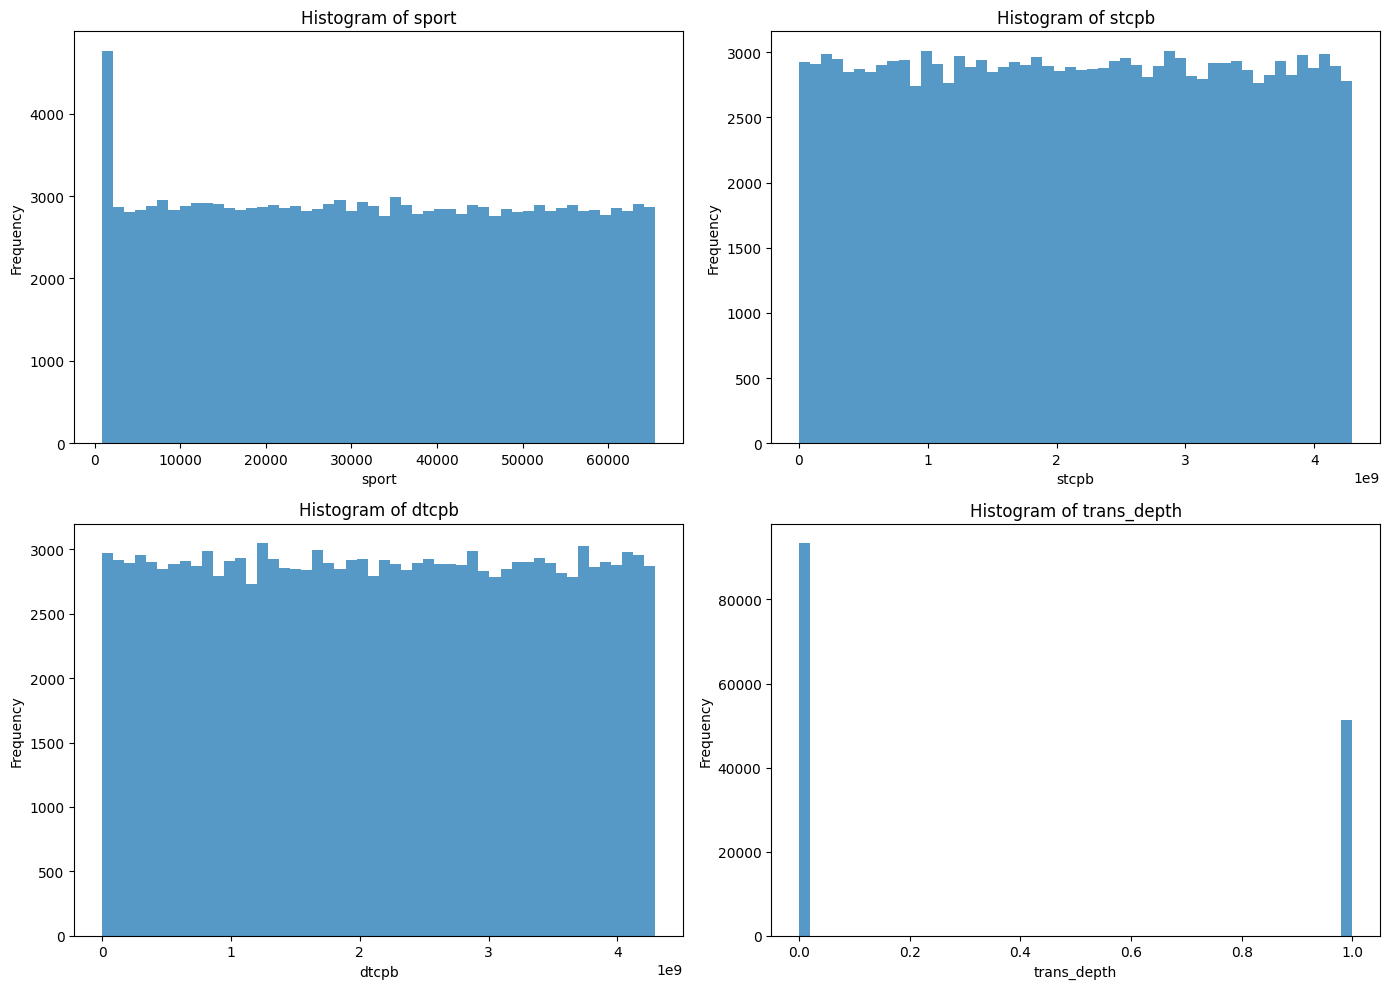

In [55]:
# Calculate skewness and kurtosis for each numeric column in df_numeric
skewness = df_numeric.skew()
kurtosis = df_numeric.kurtosis()

# Combine skewness and kurtosis into a DataFrame for better inspection
distribution_stats = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Define a function to select the best normal distribution columns based on skewness and kurtosis
def select_best_normal_columns(stats_df, skewness_thresh=0.5, kurtosis_thresh=1):
    normal_columns = stats_df[(stats_df['Skewness'].abs() < skewness_thresh) &
                              (stats_df['Kurtosis'].abs() < kurtosis_thresh)].index.tolist()
    return normal_columns

# Adjusted skewness and kurtosis thresholds
best_normal_columns = select_best_normal_columns(distribution_stats, skewness_thresh=1.0, kurtosis_thresh=2.0)

# Display the adjusted selected columns
print("Adjusted columns with the best normal distribution characteristics:", best_normal_columns)

# Set up a 2x2 grid of histograms for the adjusted columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot histograms for the adjusted normal distribution columns
for i, col in enumerate(best_normal_columns[:4]):  # Ensure only 4 columns are used
    ax = axes[i//2, i%2]  # Calculate the position in the 2x2 grid
    df_numeric[col].plot(kind='hist', bins=50, ax=ax, alpha=0.75)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Upon analyzing the histograms of the selected columns (`sport`, `swin`, `dwin`, and `stcpb`), it is evident that none of these distributions exhibit a normal (Gaussian) distribution. Instead, they show peculiar patterns that deviate significantly from the bell curve expected in a normal distribution.

- Sport: The histogram for sport reveals a nearly uniform distribution with two prominent spikes. This indicates that the source port numbers are widely varied but have certain values that occur much more frequently than others.

- Swin: The histogram for swin is highly skewed with a significant concentration of values at the maximum value of 250. This suggests that many connections have a full window size, which is common in certain network traffic conditions.

- Dwin: Similar to swin, the histogram for dwin shows a large concentration at the maximum value of 250. This again indicates a specific pattern in the destination window size for the network traffic.

- Stcpb: The histogram for stcpb demonstrates a highly skewed distribution with most values clustered at the lower end and a long tail extending towards the higher values. This suggests that the source TCP base sequence number is typically low, with occasional high values.

These plots illustrate the diverse and non-normal nature of the dataset's features, reflecting the complexity and variability inherent in network traffic data. The presence of such skewed and non-uniform distributions highlights the need for specialized techniques to effectively analyze and model this data.

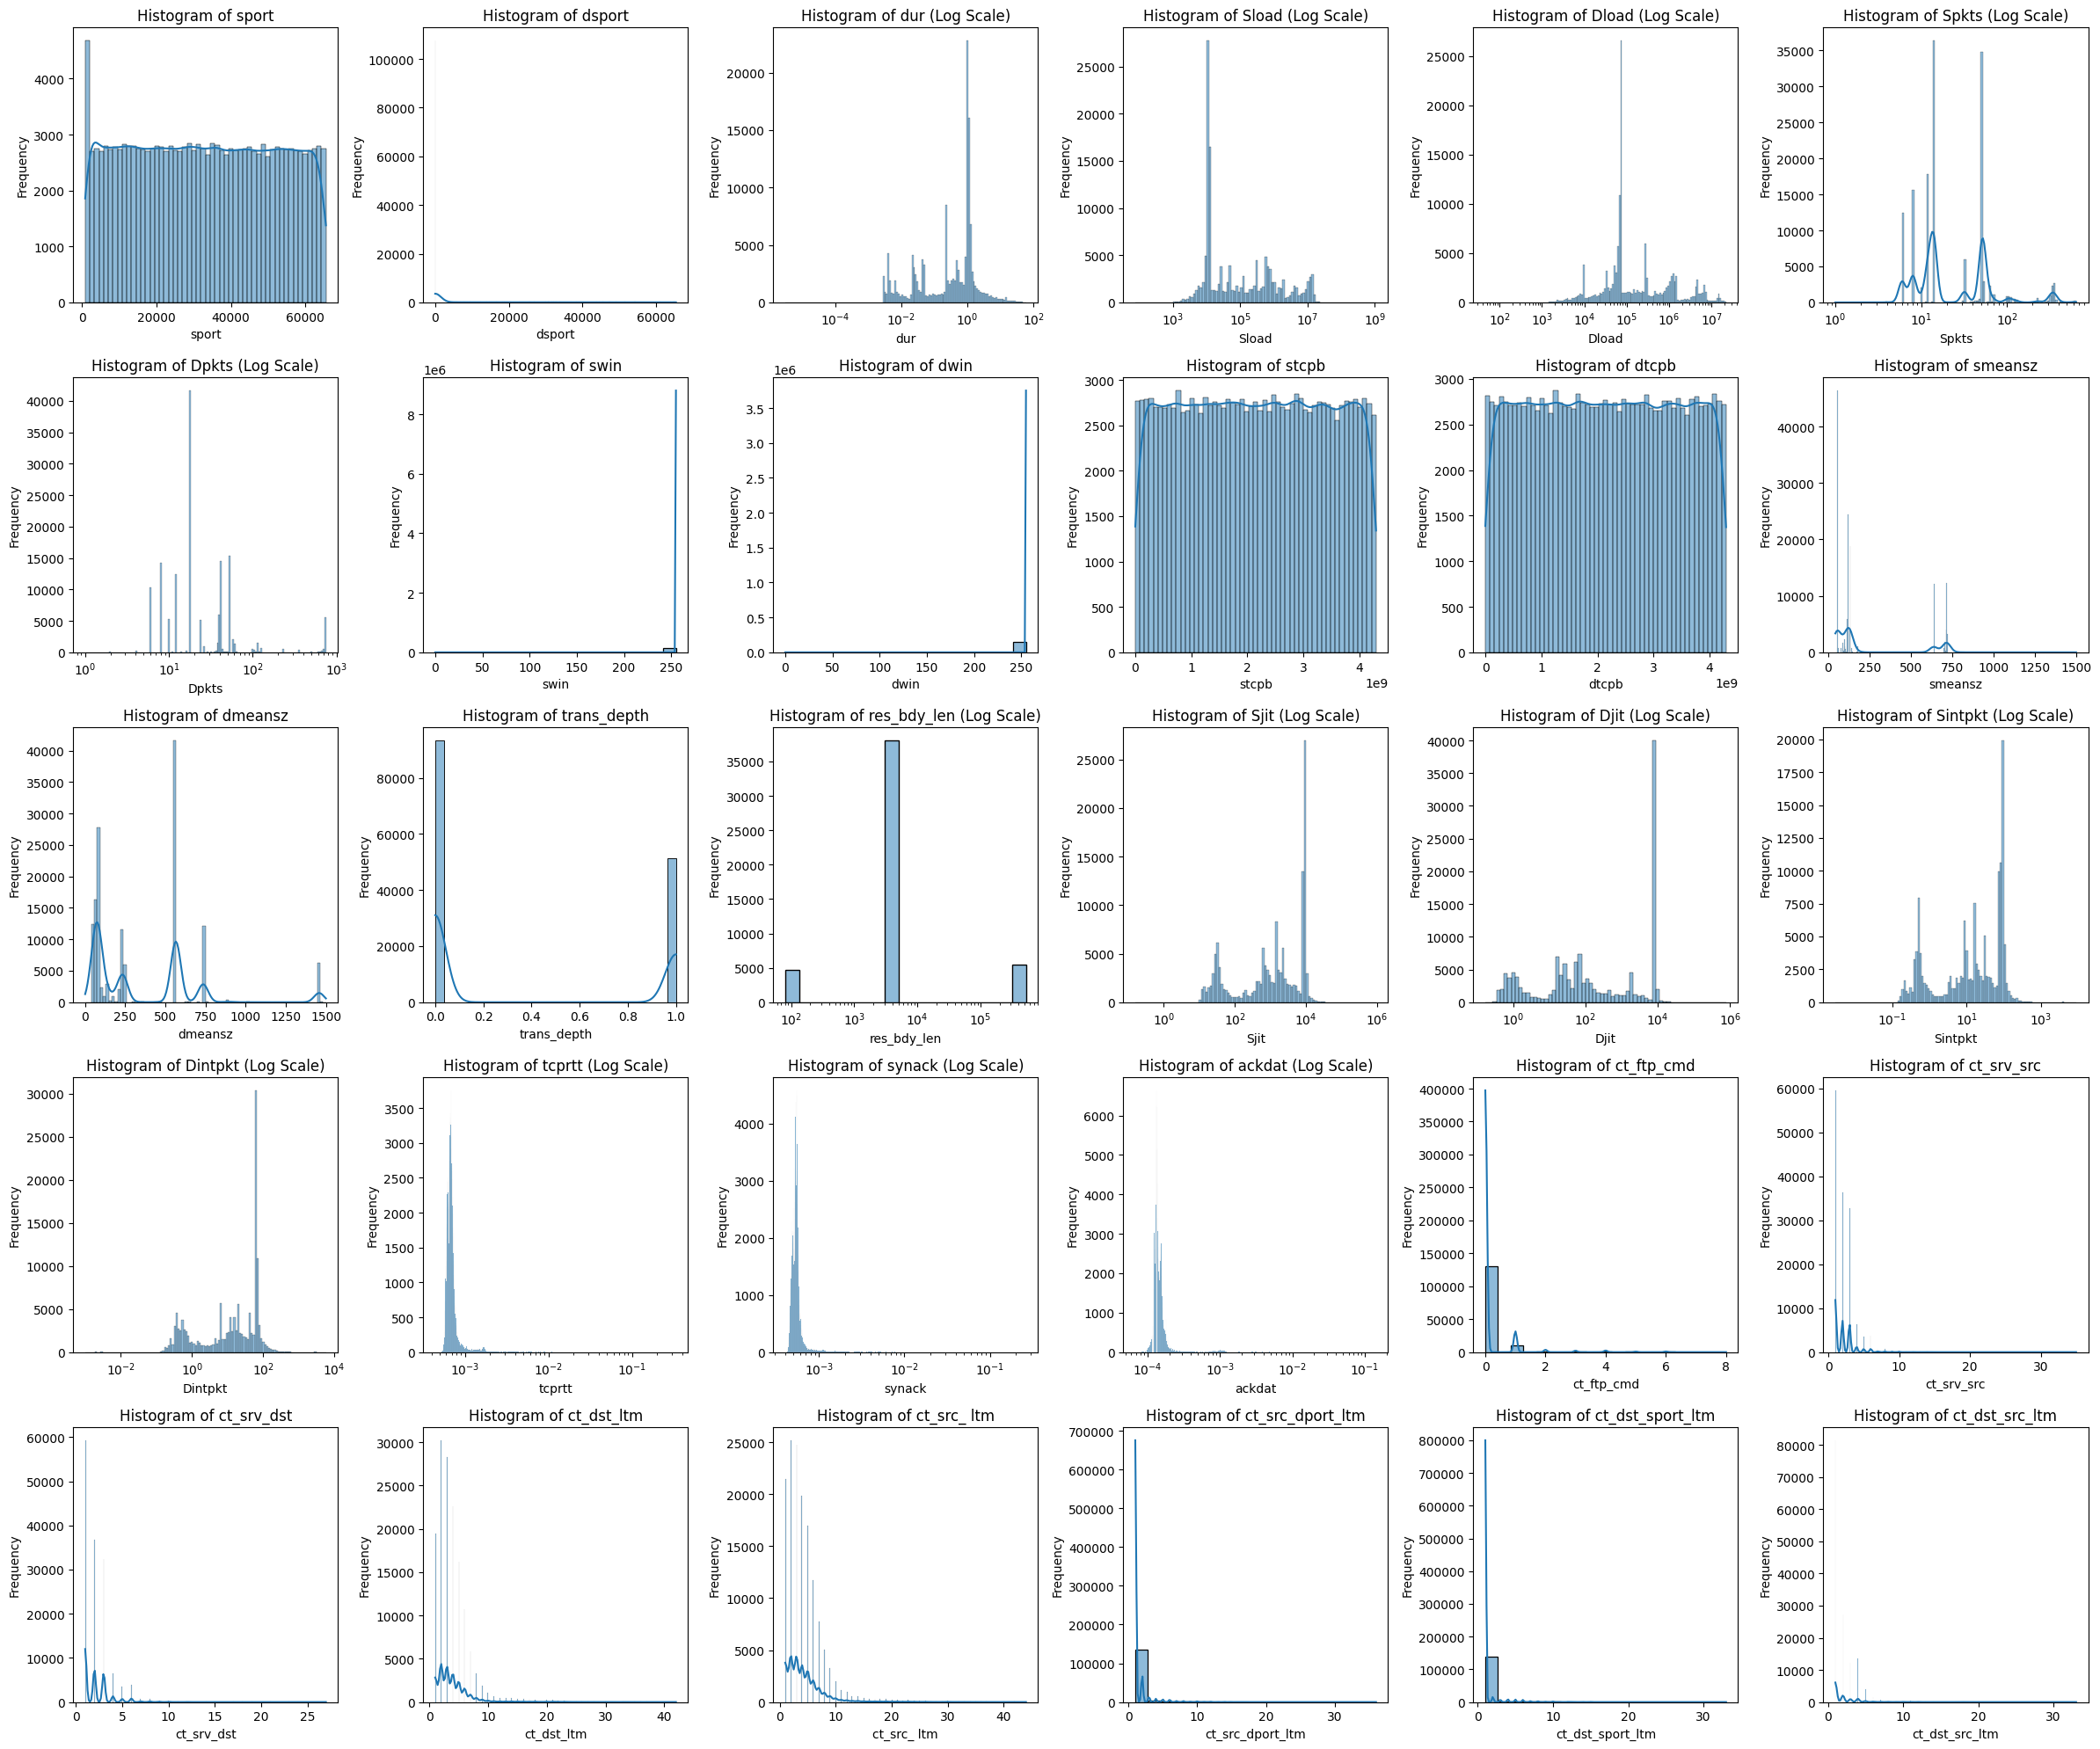

In [56]:
# Define columns to be plotted on log scale
log_scale_features = ['dur', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'res_bdy_len',
                      'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat']

# Plot histograms for all numeric columns, using appropriate scales
fig, axes = plt.subplots(nrows=(len(df_numeric.columns) + 5) // 6, ncols=6, figsize=(24, 4 * ((len(df_numeric.columns) + 5) // 6)))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    if col in log_scale_features:
        sns.histplot(df_numeric[col], kde=True, log_scale=(True, False), ax=ax)  # Log scale on x-axis
        ax.set_title(f'Histogram of {col} (Log Scale)')
    else:
        sns.histplot(df_numeric[col], kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

To understand the data distribution of all numeric features in our dataset, I plotted histograms for each feature. Visualizing these distributions helps identify patterns, detect anomalies, and grasp central tendencies and variability within the data. This foundational understanding is crucial for guiding subsequent data processing and analysis.

For features with values spanning several orders of magnitude, I used a logarithmic scale to better capture and interpret their distributions. The log scale compresses the range, making it easier to see variations and patterns that a linear scale might obscure. This approach ensures we can observe essential characteristics and make informed decisions in the data mining process.

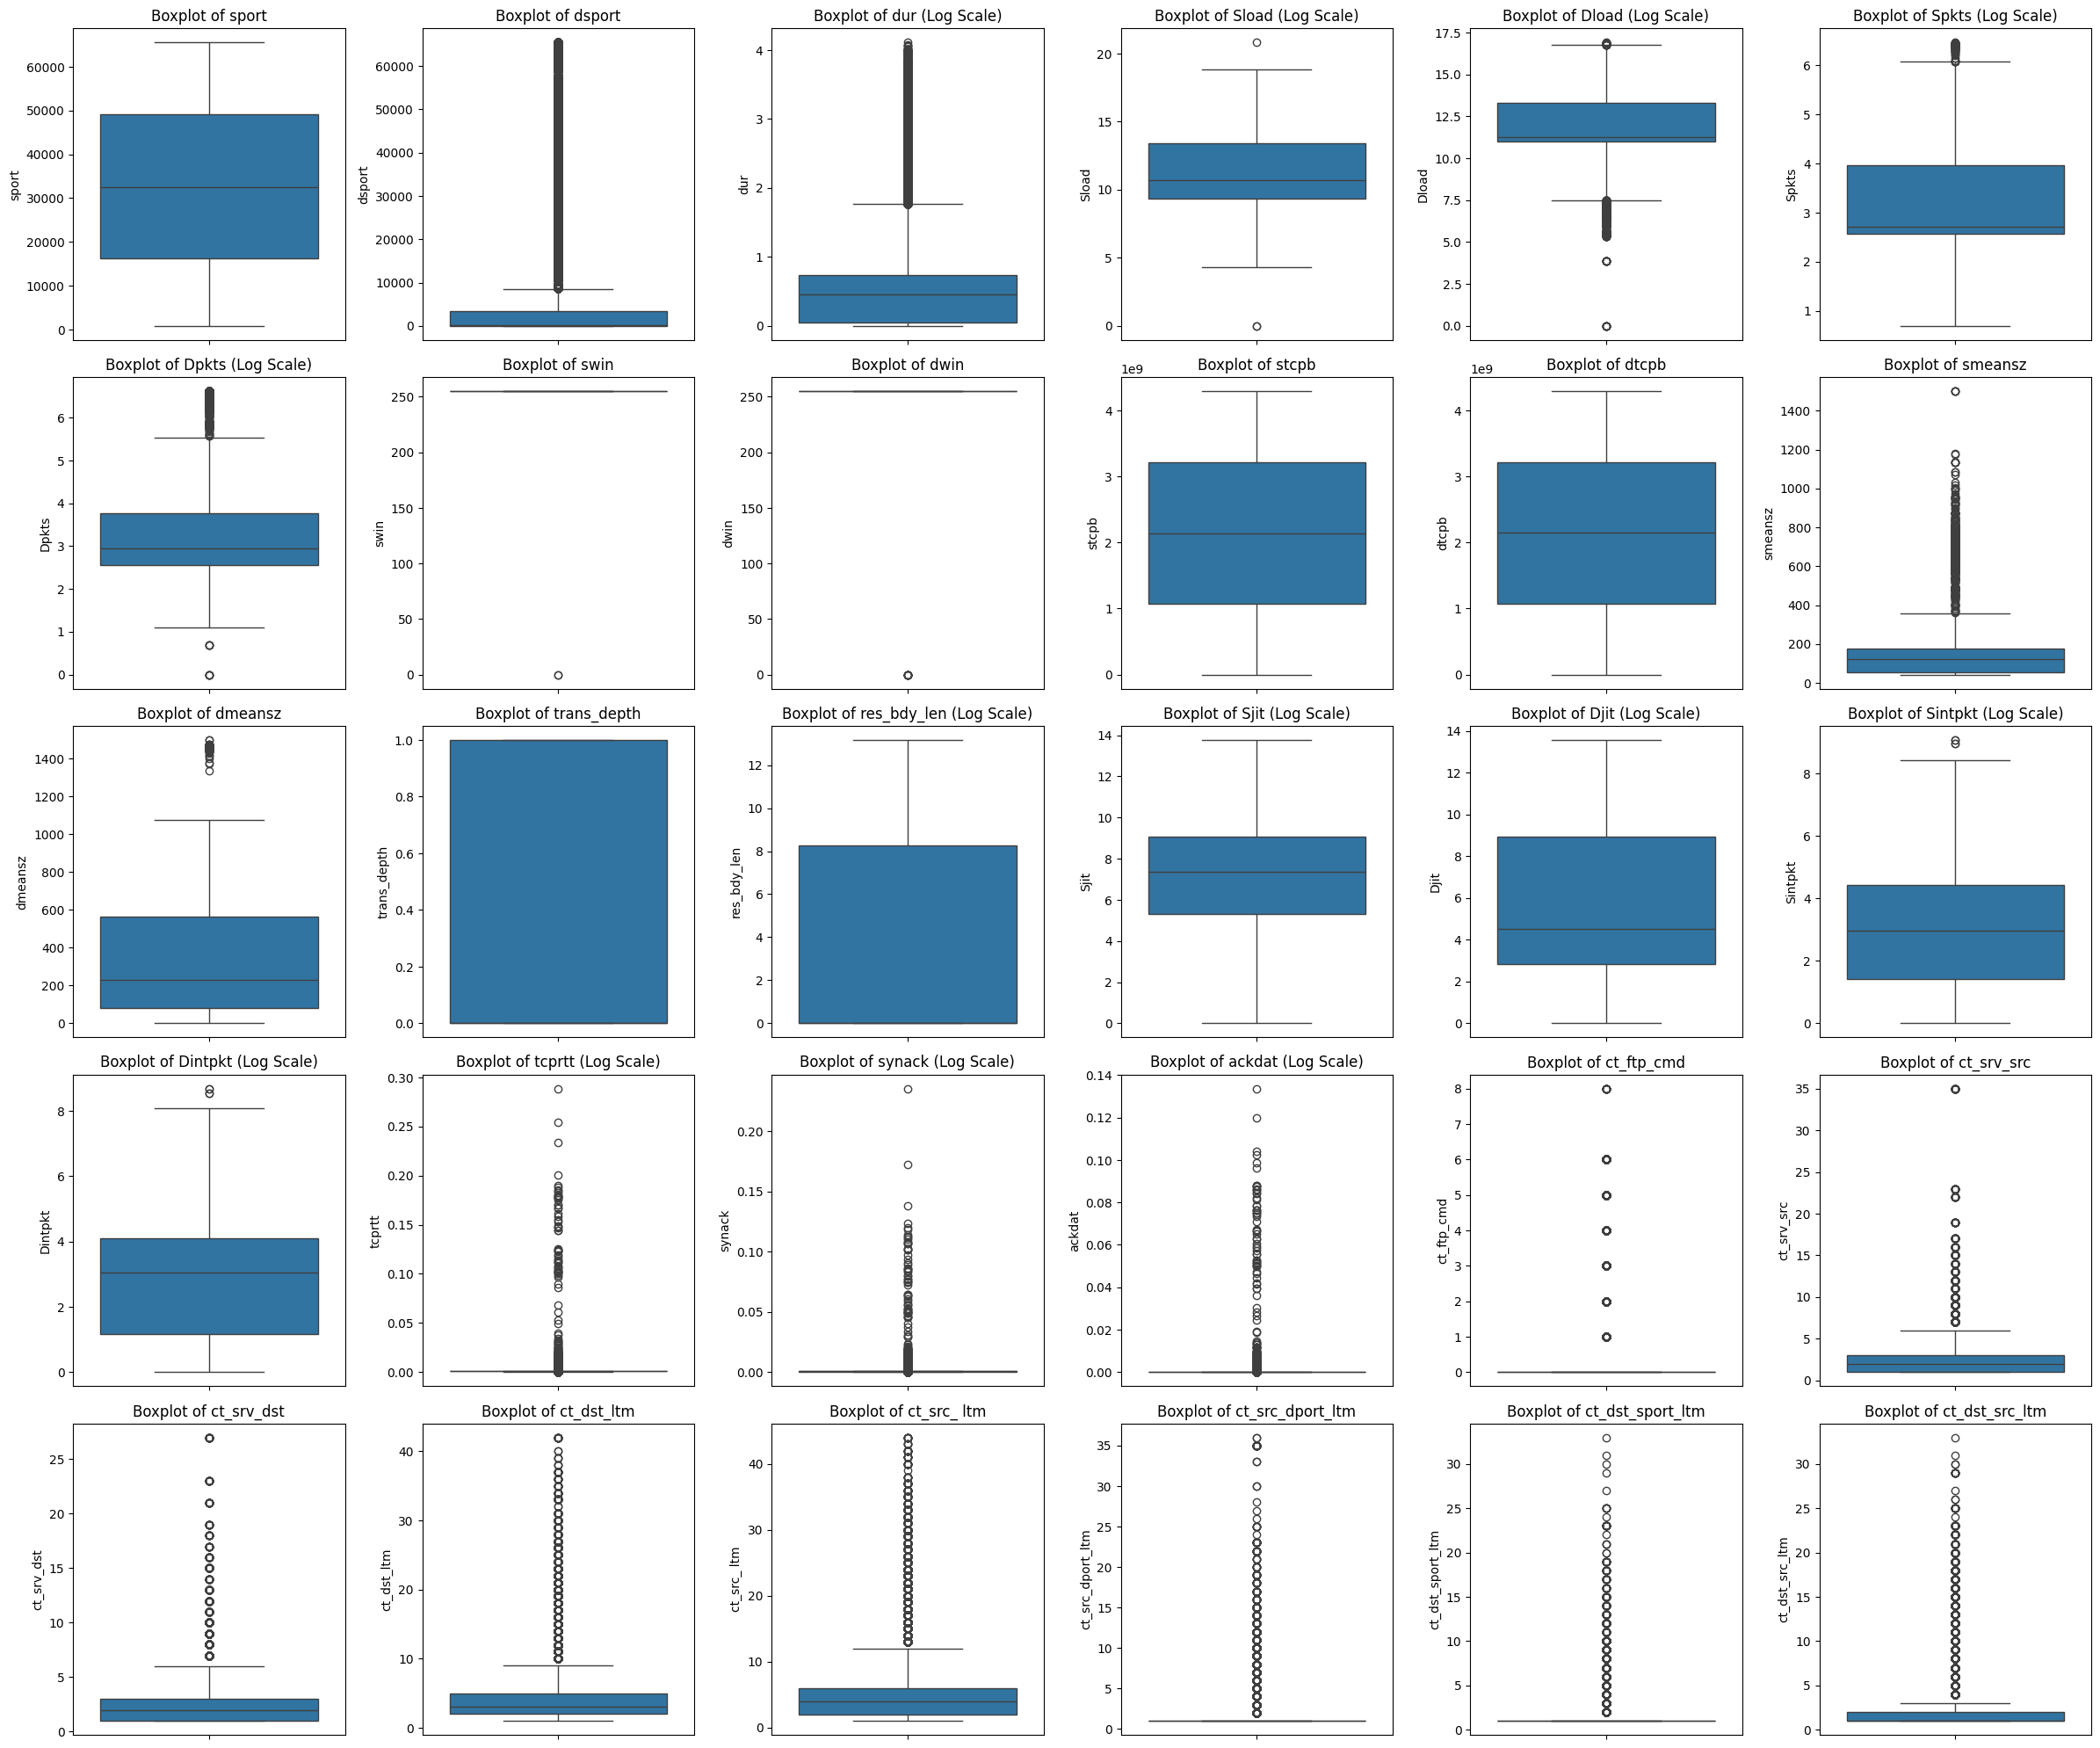

In [57]:
# Plot boxplots for all numeric columns with log-transformed values where necessary
fig, axes = plt.subplots(nrows=(len(df_numeric.columns) + 5) // 6, ncols=6, figsize=(24, 4 * ((len(df_numeric.columns) + 5) // 6)))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over each numeric column and plot boxplot
for i, col in enumerate(df_numeric.columns):
    ax = axes[i]
    if col in log_scale_features:
        sns.boxplot(y=np.log1p(df_numeric[col]), ax=ax)  # Plot log-transformed boxplot
        ax.set_title(f'Boxplot of {col} (Log Scale)')
    else:
        sns.boxplot(y=df_numeric[col], ax=ax)  # Plot regular boxplot
        ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')  # No need for x-axis label
    ax.set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


To better understand the distribution and variability of our numeric features, I've plotted boxplots for all the numeric columns in the dataset. Boxplots are useful for visualizing the central tendency and spread of the data, as well as identifying potential outliers. Given the wide range of values and the presence of some highly skewed features, I've applied logarithmic transformations to certain columns to make the visualizations more interpretable.

The boxplots reveal several interesting characteristics of the data. Many features exhibit a significant number of outliers, such as `Spkts`, `Dpkts`, and `Sload`. This suggests that there are extreme values that deviate considerably from the majority of the data, which could be important for identifying unusual network traffic patterns or potential anomalies. Additionally, several features like `swin`, `dwin`, and `ct_ftp_cmd` are highly discrete, with a limited number of unique values. These discrete features might represent categorical data or specific states within the network traffic.

Overall, the boxplots help us identify which features have a large variance and a high number of outliers. This insight will be valuable for further analysis, particularly in clustering and anomaly detection, where understanding the distribution of each feature is crucial for selecting appropriate algorithms and preprocessing techniques

In [58]:
# Array with selected features for advanced analysis
selected_features = [
    'dur', 'Sload', 'Dload', 'Spkts', 'Dpkts',
    'smeansz', 'dmeansz', 'Sjit', 'Djit',
    'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat'
]

# Create a log-transformed dataframe for selected features
log_transformed_df = df_numeric[selected_features].apply(np.log1p)

# Normalize log_transformed_df
log_transformed_df = (log_transformed_df - log_transformed_df.mean()) / log_transformed_df.std()

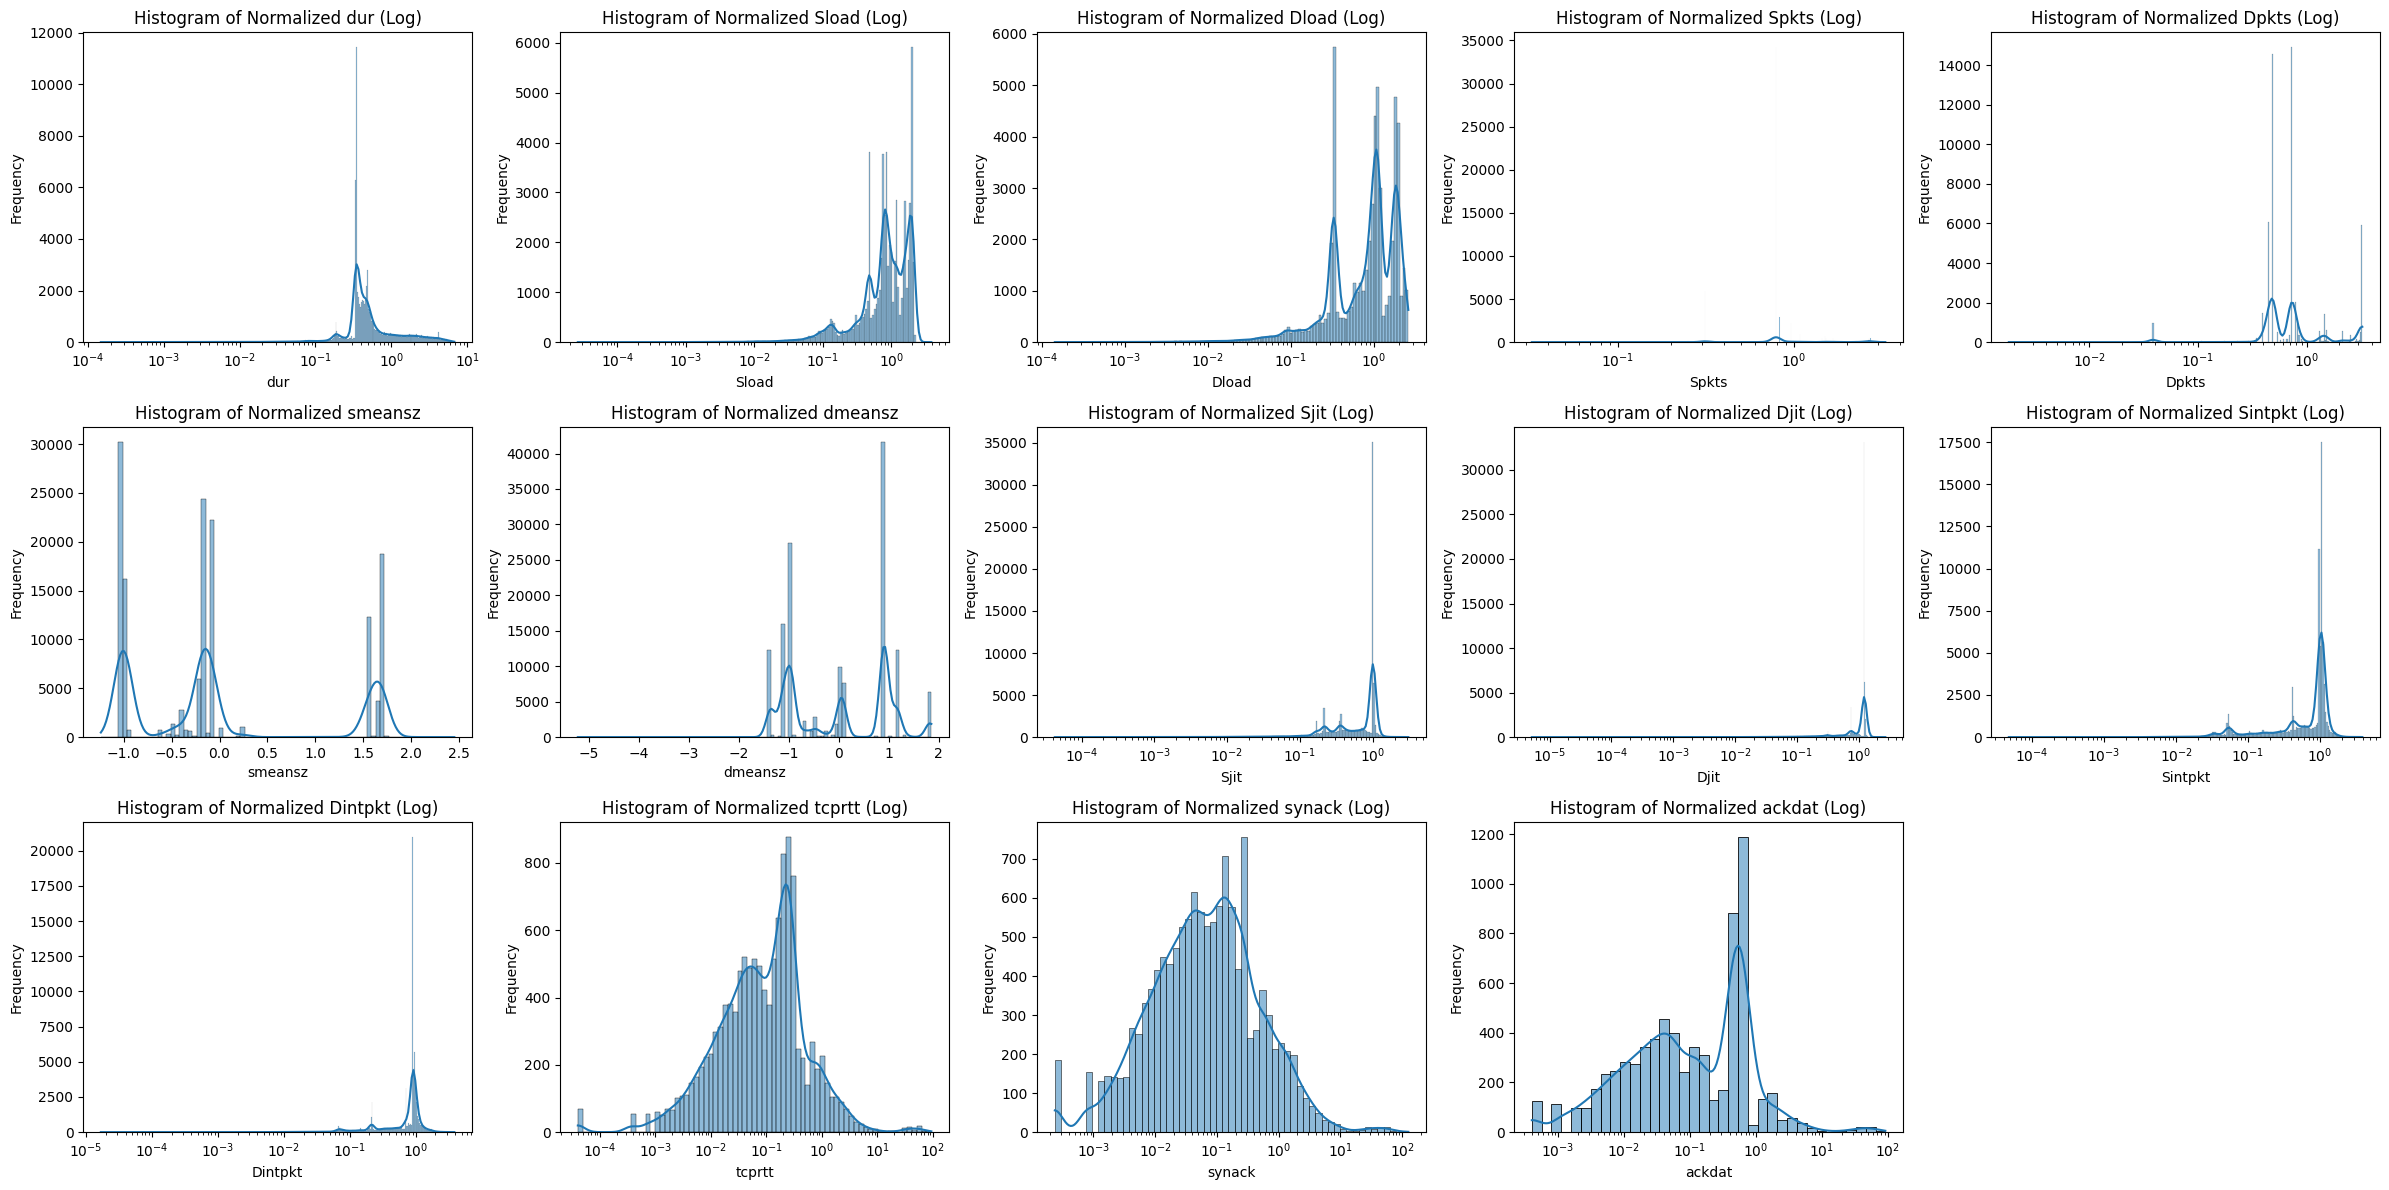

In [59]:
# Define columns to be plotted on log scale
log_scale_features = ['dur', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'res_bdy_len',
                      'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat']

# Plot histograms for all numeric columns, using appropriate scales
fig, axes = plt.subplots(nrows=(len(log_transformed_df.columns) + 4) // 5, ncols=5, figsize=(24, 4 * ((len(log_transformed_df.columns) + 4) // 5)))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(selected_features):
    ax = axes[i]
    if col in log_scale_features:
        sns.histplot(log_transformed_df[col], kde=True, log_scale=(True, False), ax=ax)  # Log scale on x-axis
        ax.set_title(f'Histogram of Normalized {col} (Log)')
    else:
        sns.histplot(log_transformed_df[col], kde=True, ax=ax)
        ax.set_title(f'Histogram of Normalized {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Now, this log_transformed_df will be the default dataframe for further analysis

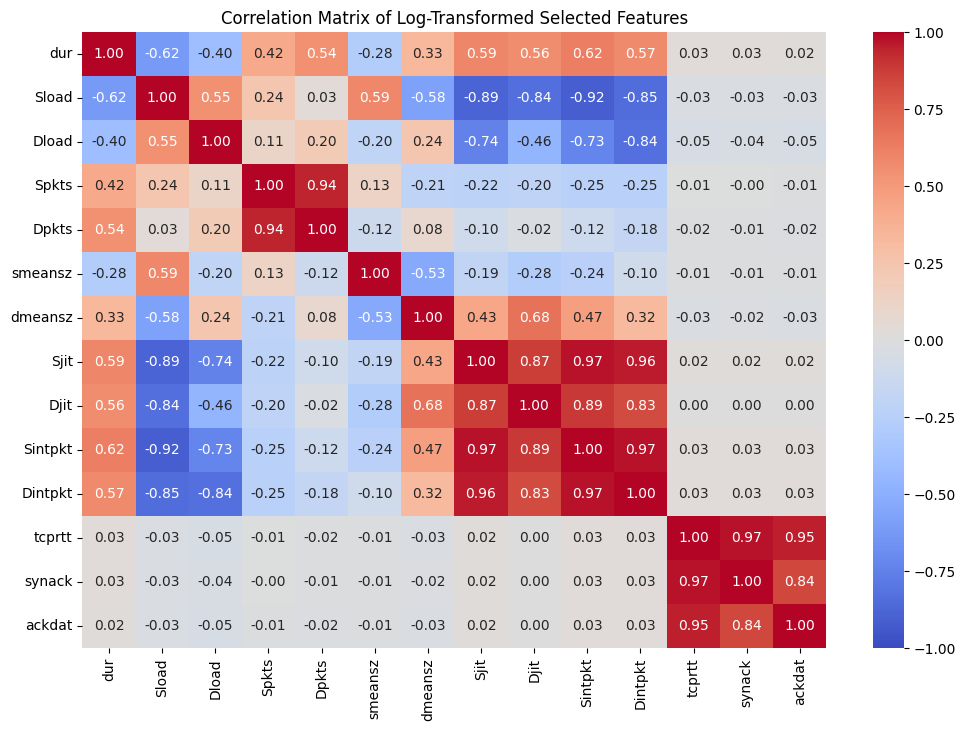

In [60]:
# Correlation Matrix
corr_matrix = log_transformed_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Log-Transformed Selected Features')
plt.show()

The correlation matrix above showcases the relationships between the log-transformed selected features in our dataset. A high positive correlation, such as between `Spkts` and `Dpkts` (0.94), indicates that these features tend to increase together. Similarly, `tcprtt`, `synack`, and `ackdat` also exhibit strong positive correlations with each other, suggesting they are closely related in the network traffic context.

Conversely, negative correlations, like between `Sjit` and `Sload` (-0.89), suggest an inverse relationship, meaning as one feature increases, the other tends to decrease. The matrix helps identify these relationships, providing insight into which features might be redundant or particularly impactful for further analysis. This understanding will guide our feature selection and engineering processes, ensuring we focus on the most informative features for advanced analyses like clustering and classification.

##### Plotting Histogram-Scatterplot Matrices
Now that we know the correlation scores between the features, we'll visualize details of the relationship between each pair of variables in the dataset. The following Pair Plots combine both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations.

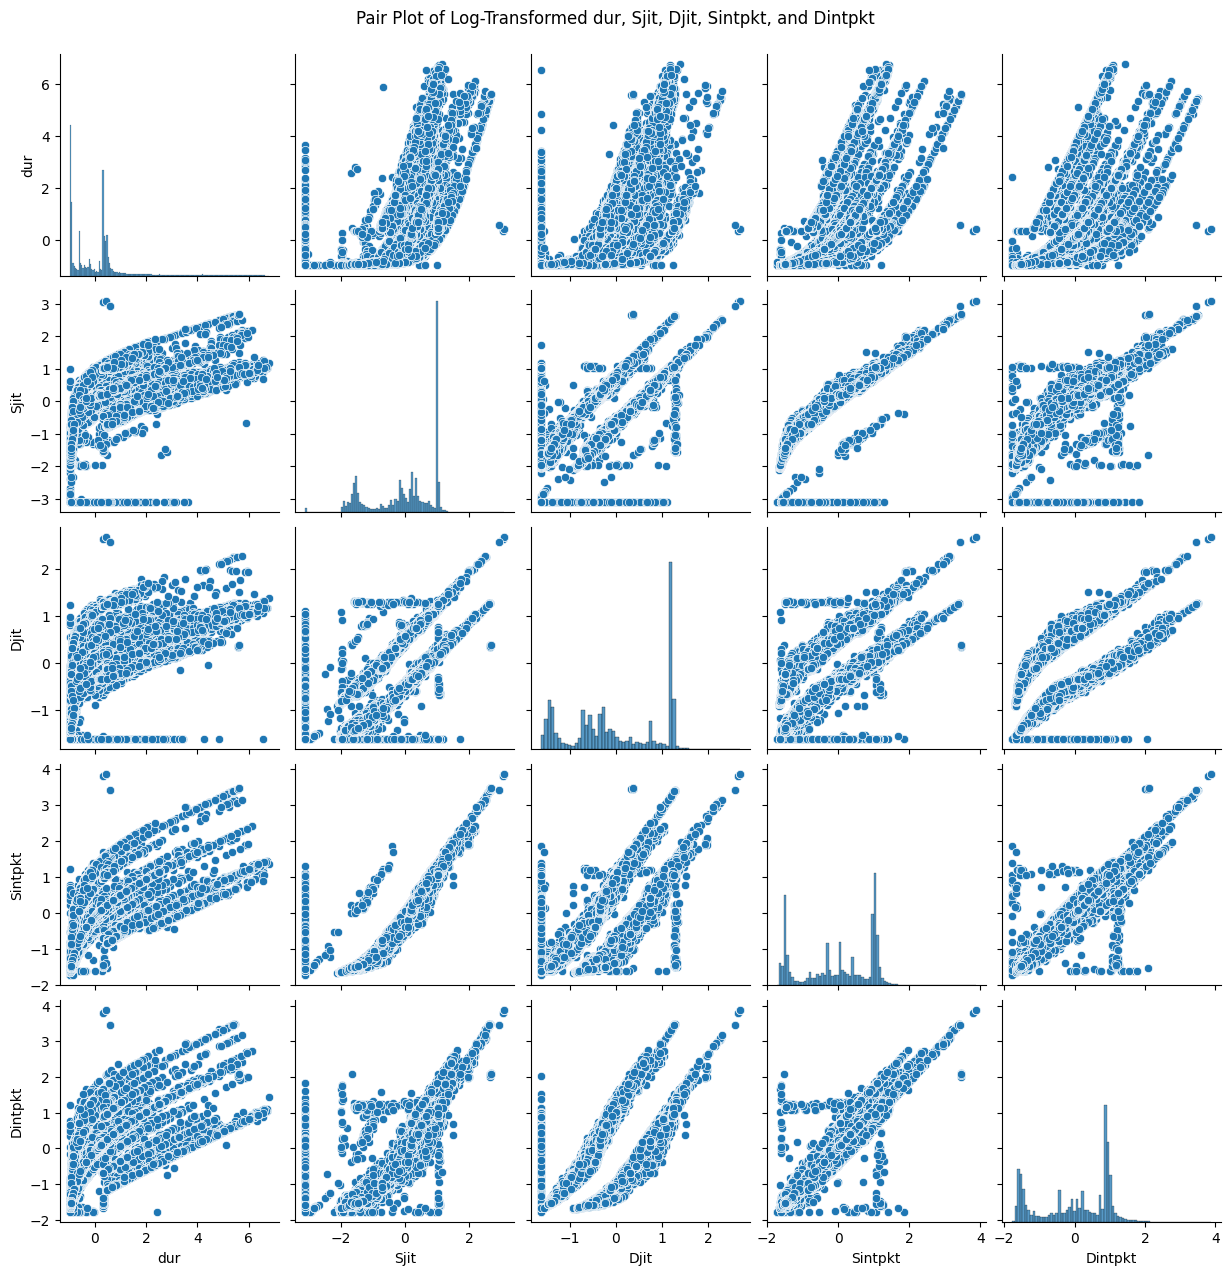

In [61]:
# Pair plot for 'dur', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt'
sns.pairplot(log_transformed_df[['dur', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt']])
plt.suptitle('Pair Plot of Log-Transformed dur, Sjit, Djit, Sintpkt, and Dintpkt', y=1.02)
plt.show()

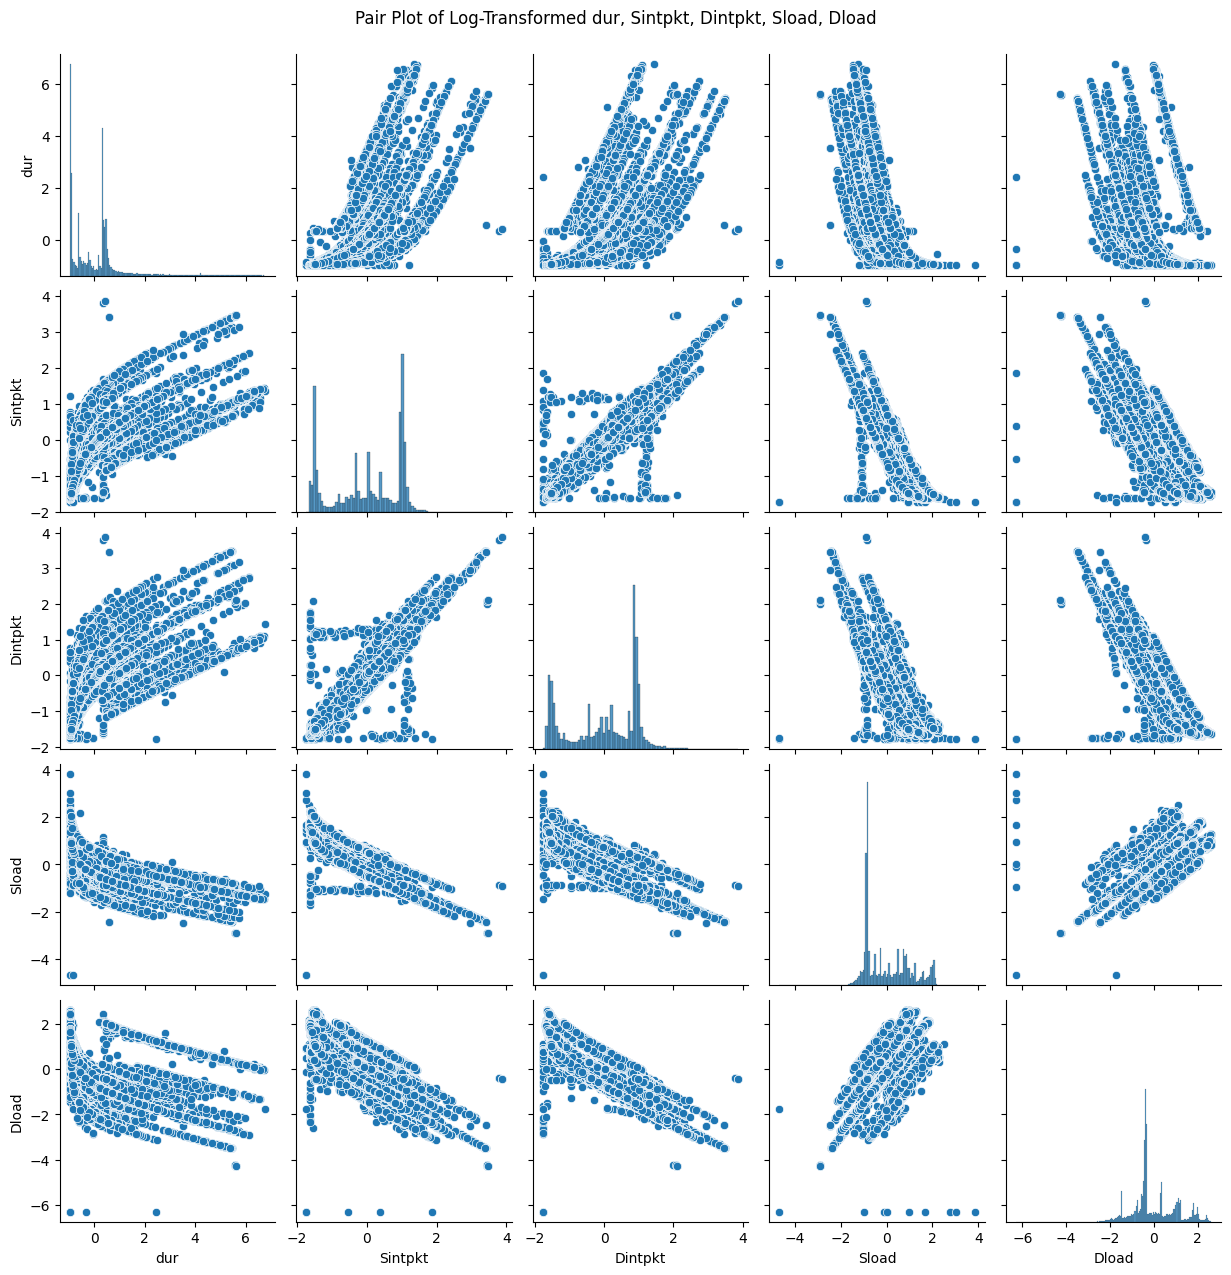

In [62]:
# Pair plot for 'dur', 'Sintpkt', 'Dintpkt', 'Sload', 'Dload'
sns.pairplot(log_transformed_df[['dur', 'Sintpkt', 'Dintpkt', 'Sload', 'Dload']])
plt.suptitle('Pair Plot of Log-Transformed dur, Sintpkt, Dintpkt, Sload, Dload', y=1.02)
plt.show()

This pair plot, which includes 'Sjit', 'Djit', 'Sintpkt', and 'Dintpkt', exhibits some intriguing patterns. Here are a few observations:

- Distinct Clusters: There are distinct linear clusters in the scatter plots. These clusters suggest that there may be underlying patterns or subgroups within the data. The clusters might represent different types of network behaviors or anomalies that need further investigation.

- Strong Correlations: The features 'Sjit' and 'Djit', as well as 'Sintpkt' and 'Dintpkt', show strong positive correlations. This is indicated by the linear patterns in the scatter plots, where higher values of one feature correspond to higher values of the other. Such strong correlations imply that these features are closely related in capturing network traffic characteristics.

- Discontinuities and Gaps: The presence of discontinuities and gaps in the scatter plots suggests that there might be certain ranges of values that are not represented in the dataset. This could be due to the nature of the network traffic data or specific filtering applied during data collection.

- Outliers: There are noticeable outliers in the plots, especially in 'Sjit' and 'Djit'. These outliers could represent unusual network activities or errors in data collection. Identifying and analyzing these outliers can be crucial for understanding anomalies in network traffic.

- Log Transformation: The log transformation has helped in visualizing the data more effectively, revealing patterns that were not apparent in the original scale. However, the extreme values still dominate the visualization, indicating the highly skewed nature of the original data.

In summary, the first pair plot reveals significant correlations, distinct clusters, and the presence of outliers in the selected network traffic features. These observations suggest potential areas for further analysis, such as clustering and anomaly detection, to better understand the underlying patterns in the network traffic data.

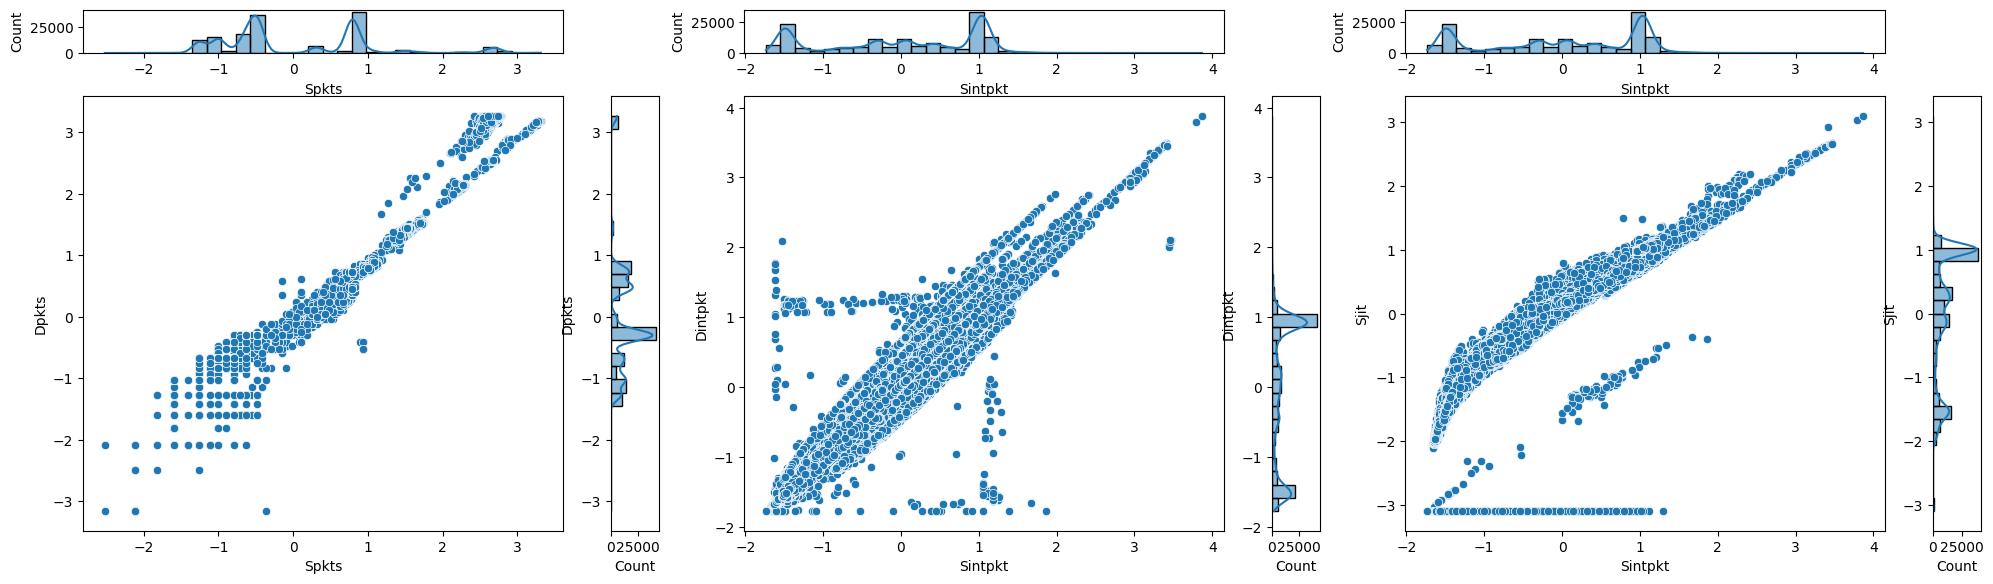

In [63]:
# Create a new figure to hold all the JointGrid plots
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3)

# Create the first subplot
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=log_transformed_df, x='Spkts', y='Dpkts', ax=ax1)
ax1_marg_x = ax1.inset_axes([0, 1.1, 1, 0.1], sharex=ax1)
ax1_marg_y = ax1.inset_axes([1.1, 0, 0.1, 1], sharey=ax1)
sns.histplot(data=log_transformed_df, x='Spkts', ax=ax1_marg_x, kde=True, bins=30, fill=True)
sns.histplot(data=log_transformed_df, y='Dpkts', ax=ax1_marg_y, kde=True, bins=30, fill=True)

# Create the second subplot
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=log_transformed_df, x='Sintpkt', y='Dintpkt', ax=ax2)
ax2_marg_x = ax2.inset_axes([0, 1.1, 1, 0.1], sharex=ax2)
ax2_marg_y = ax2.inset_axes([1.1, 0, 0.1, 1], sharey=ax2)
sns.histplot(data=log_transformed_df, x='Sintpkt', ax=ax2_marg_x, kde=True, bins=30, fill=True)
sns.histplot(data=log_transformed_df, y='Dintpkt', ax=ax2_marg_y, kde=True, bins=30, fill=True)

# Create the third subplot
ax3 = fig.add_subplot(gs[0, 2])
sns.scatterplot(data=log_transformed_df, x='Sintpkt', y='Sjit', ax=ax3)
ax3_marg_x = ax3.inset_axes([0, 1.1, 1, 0.1], sharex=ax3)
ax3_marg_y = ax3.inset_axes([1.1, 0, 0.1, 1], sharey=ax3)
sns.histplot(data=log_transformed_df, x='Sintpkt', ax=ax3_marg_x, kde=True, bins=30, fill=True)
sns.histplot(data=log_transformed_df, y='Sjit', ax=ax3_marg_y, kde=True, bins=30, fill=True)

plt.tight_layout()
plt.show()



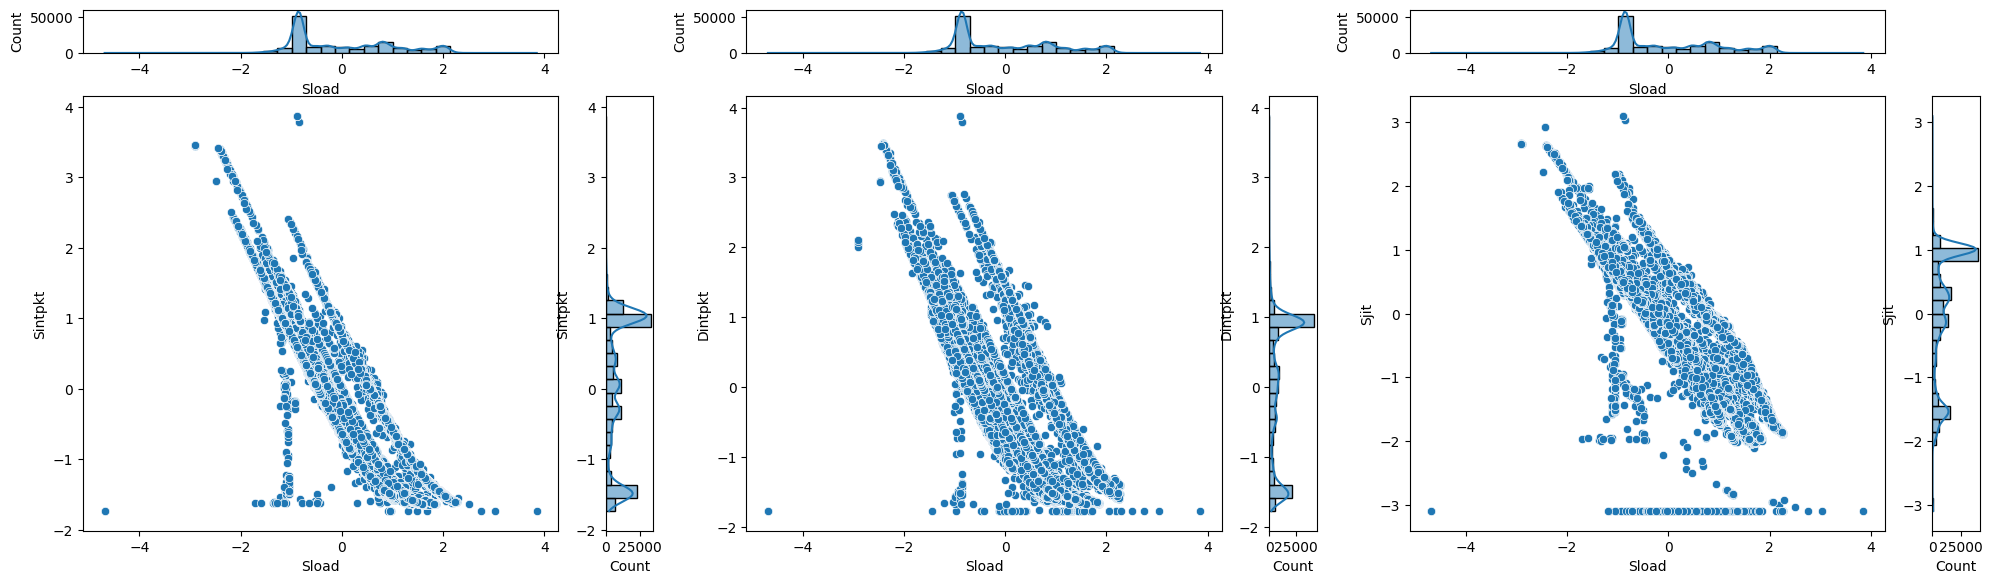

In [64]:
# Create a new figure to hold all the JointGrid plots for negative correlations
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3)

# Create the first subplot
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=log_transformed_df, x='Sload', y='Sintpkt', ax=ax1)
ax1_marg_x = ax1.inset_axes([0, 1.1, 1, 0.1], sharex=ax1)
ax1_marg_y = ax1.inset_axes([1.1, 0, 0.1, 1], sharey=ax1)
sns.histplot(data=log_transformed_df, x='Sload', ax=ax1_marg_x, kde=True, bins=30, fill=True)
sns.histplot(data=log_transformed_df, y='Sintpkt', ax=ax1_marg_y, kde=True, bins=30, fill=True)

# Create the second subplot
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=log_transformed_df, x='Sload', y='Dintpkt', ax=ax2)
ax2_marg_x = ax2.inset_axes([0, 1.1, 1, 0.1], sharex=ax2)
ax2_marg_y = ax2.inset_axes([1.1, 0, 0.1, 1], sharey=ax2)
sns.histplot(data=log_transformed_df, x='Sload', ax=ax2_marg_x, kde=True, bins=30, fill=True)
sns.histplot(data=log_transformed_df, y='Dintpkt', ax=ax2_marg_y, kde=True, bins=30, fill=True)

# Create the third subplot
ax3 = fig.add_subplot(gs[0, 2])
sns.scatterplot(data=log_transformed_df, x='Sload', y='Sjit', ax=ax3)
ax3_marg_x = ax3.inset_axes([0, 1.1, 1, 0.1], sharex=ax3)
ax3_marg_y = ax3.inset_axes([1.1, 0, 0.1, 1], sharey=ax3)
sns.histplot(data=log_transformed_df, x='Sload', ax=ax3_marg_x, kde=True, bins=30, fill=True)
sns.histplot(data=log_transformed_df, y='Sjit', ax=ax3_marg_y, kde=True, bins=30, fill=True)

plt.tight_layout()
plt.show()




### 4. Methodology

In this section, we explore various data mining methods applicable to our project, including streaming analysis, clustering, dimensionality reduction, similarity search, and more.



#### 4.1 Streaming Analysis
In this section, we implement streaming analytics methods such as moving averages and exponential smoothing to analyze the time-series data in our dataset. These methods help smooth out short-term fluctuations and highlight longer-term trends or cycles. The concepts are derived from the "Streaming" assignment, and we apply them to key features such as duration (dur), source jitter (Sjit), and destination jitter (Djit). By visualizing the results, we can better understand the behavior and trends within our dataset over time.


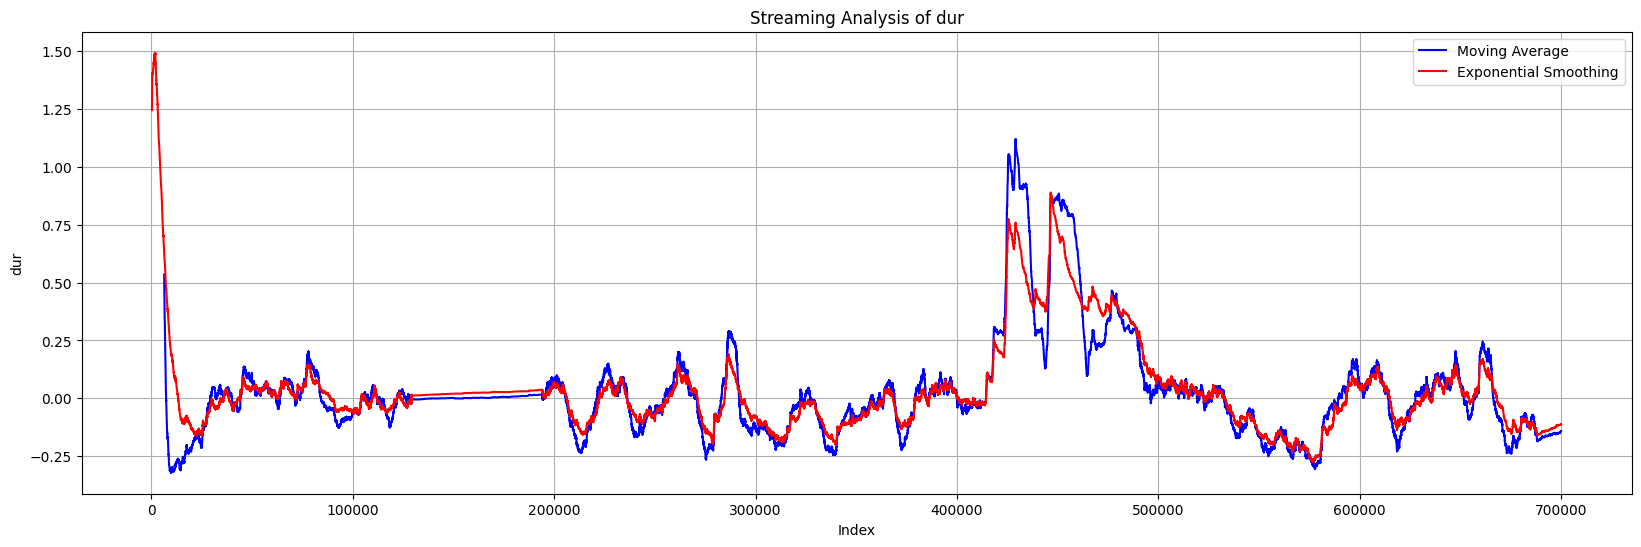

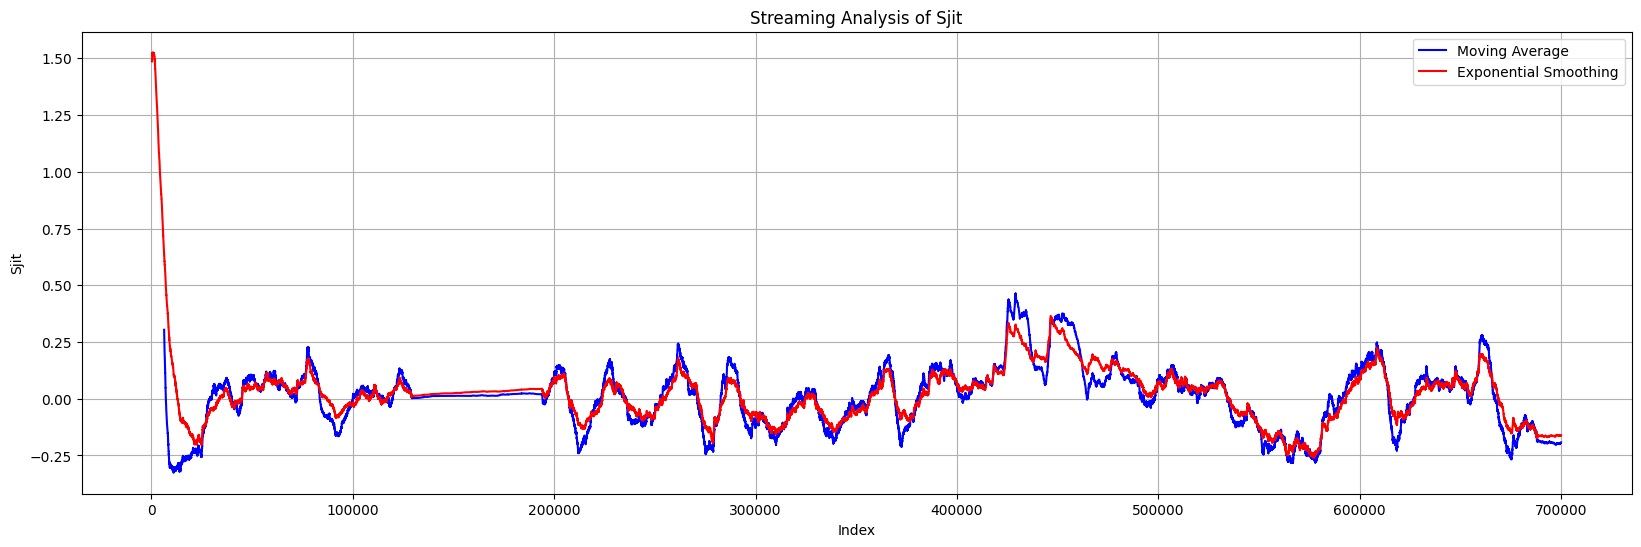

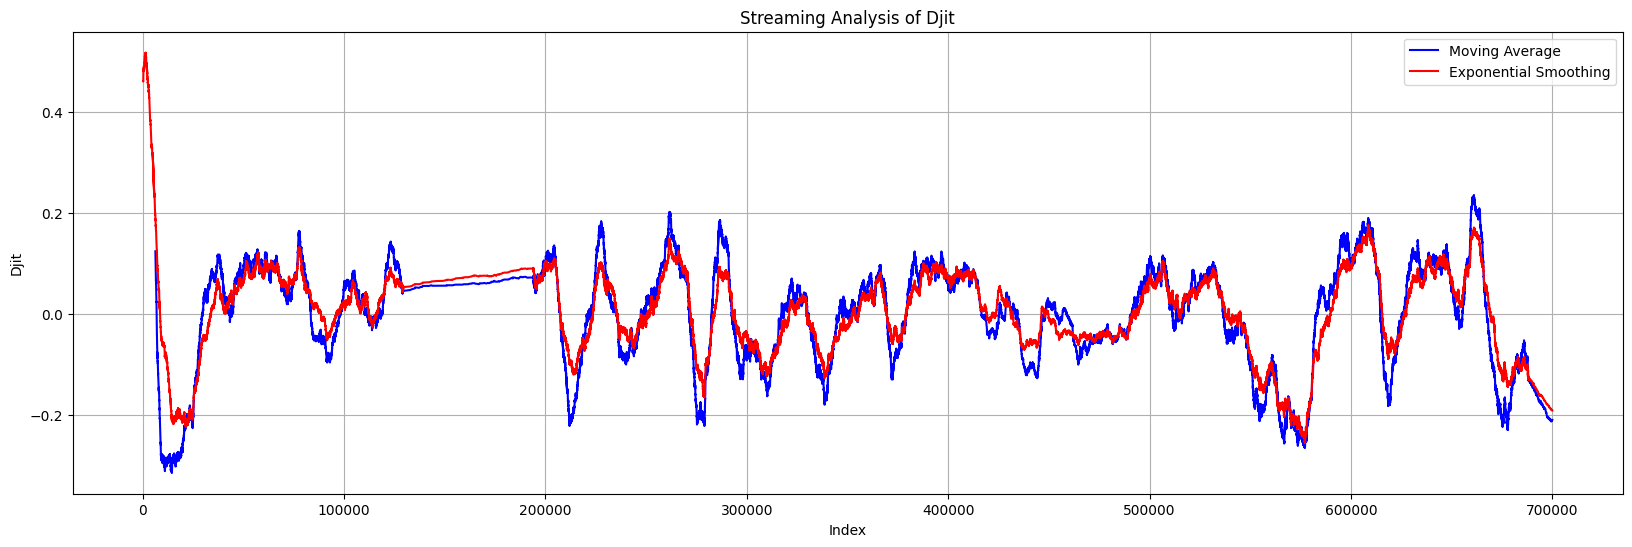

In [65]:
# Function to plot moving average and exponential smoothing
def plot_streaming_analysis(df_param, column, window_size=70):
    # Copy a column of the data for visualization
    streaming_df = df_param[column].copy()

    plt.figure(figsize=(20, 6))

    # Moving average
    moving_avg = streaming_df.rolling(window=window_size).mean()
    plt.plot(streaming_df.index, moving_avg, label='Moving Average', color='blue')

    # Exponential smoothing
    exp_smoothing = streaming_df.ewm(span=(window_size*2), adjust=False).mean()
    plt.plot(streaming_df.index, exp_smoothing, label='Exponential Smoothing', color='red')

    plt.title(f'Streaming Analysis of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Set a window size size for better readability
window_size = 1500

# Plotting moving average and exponential smoothing for 'dur', 'Sjit', and 'Djit'
plot_streaming_analysis(log_transformed_df, 'dur', window_size)
plot_streaming_analysis(log_transformed_df, 'Sjit', window_size)
plot_streaming_analysis(log_transformed_df, 'Djit', window_size)


The streaming analysis plots for 'dur', 'Sjit', and 'Djit' have been updated using the entire dataset with a window size of 7000 for both moving averages and exponential smoothing. This approach allows us to maintain fidelity to the smaller window plots while making the overall trends and patterns more readable. The moving average (blue line) and exponential smoothing (red line) closely follow the data's trends, with exponential smoothing being slightly more responsive to sudden changes. This comprehensive analysis demonstrates the effectiveness of these smoothing techniques in highlighting long-term trends while mitigating short-term fluctuations.

In [66]:
log_transformed_df

dur     Sload     Dload     Spkts     Dpkts   smeansz   dmeansz  \
246     1.243325 -1.364527 -2.141099 -0.999636 -0.832739 -0.082715 -0.950284   
247     1.105503 -1.320387 -2.084289 -0.999636 -0.832739 -0.082715 -0.950284   
248     2.245014 -1.651796 -2.510805 -0.999636 -0.832739 -0.082715 -0.950284   
249     2.005442 -1.587170 -2.427637 -0.999636 -0.832739 -0.082715 -0.950284   
250     2.728499 -1.777014 -2.671947 -0.999636 -0.832739 -0.082715 -0.950284   
...          ...       ...       ...       ...       ...       ...       ...   
699833  0.240974 -0.524581 -0.817192  0.791746  0.728703 -0.967763 -1.115147   
699839  0.485417 -0.629720 -0.952519  0.791746  0.728703 -0.967763 -1.115147   
699864  0.696198 -0.711267 -1.057481  0.791746  0.728703 -0.967763 -1.115147   
699904  0.699207 -0.712382 -1.058916  0.791746  0.728703 -0.967763 -1.115147   
699996  0.683008  0.075331  1.952364  2.741283  3.259637 -1.024239  1.824134   

            Sjit      Djit   Sintpkt   Dintpkt    tcprtt    synack    ackdat  
246     1.485880  0.460574  1.822086  1.818737 -0.020458 -0.014205 -0.026513  
247     1.427671  0.423170  1.755760  1.748938 -0.019156 -0.020088 -0.016162  
248     1.797522  0.681485  2.253063  2.273670 -0.033473 -0.036135 -0.025823  
249     1.722083  0.632929  2.156250  2.171240 -0.025989 -0.020623 -0.029964  
250     1.927447  0.779662  2.441373  2.472238 -0.039004 -0.043089 -0.028584  
...          ...       ...       ...       ...       ...       ...       ...  
699833  0.179640 -0.342223  0.069292  0.107293 -0.048115 -0.044694 -0.045837  
699839  0.212352 -0.342154  0.219874  0.266031 -0.049417 -0.052183 -0.038935  
699864  0.345723 -0.250393  0.337813  0.390391 -0.055599 -0.057532 -0.045147  
699904  0.408144 -0.288631  0.339423  0.392085 -0.038679 -0.040949 -0.030654  
699996 -0.701741 -0.112837 -0.759482 -1.084521 -0.033473 -0.037205 -0.024443  

[144679 rows x 14 columns]

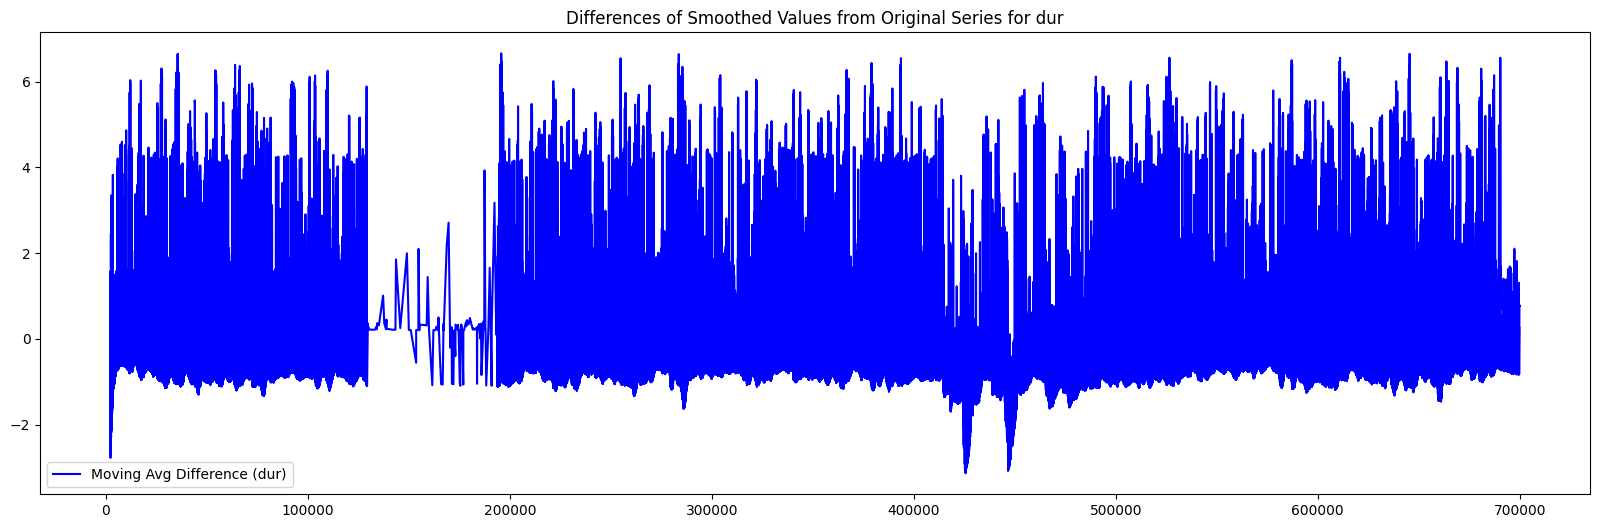

RMS Error for Moving Average (dur): 0.9725917989858258
RMS Error for Exponential Smoothing (dur): 0.9689138277248865




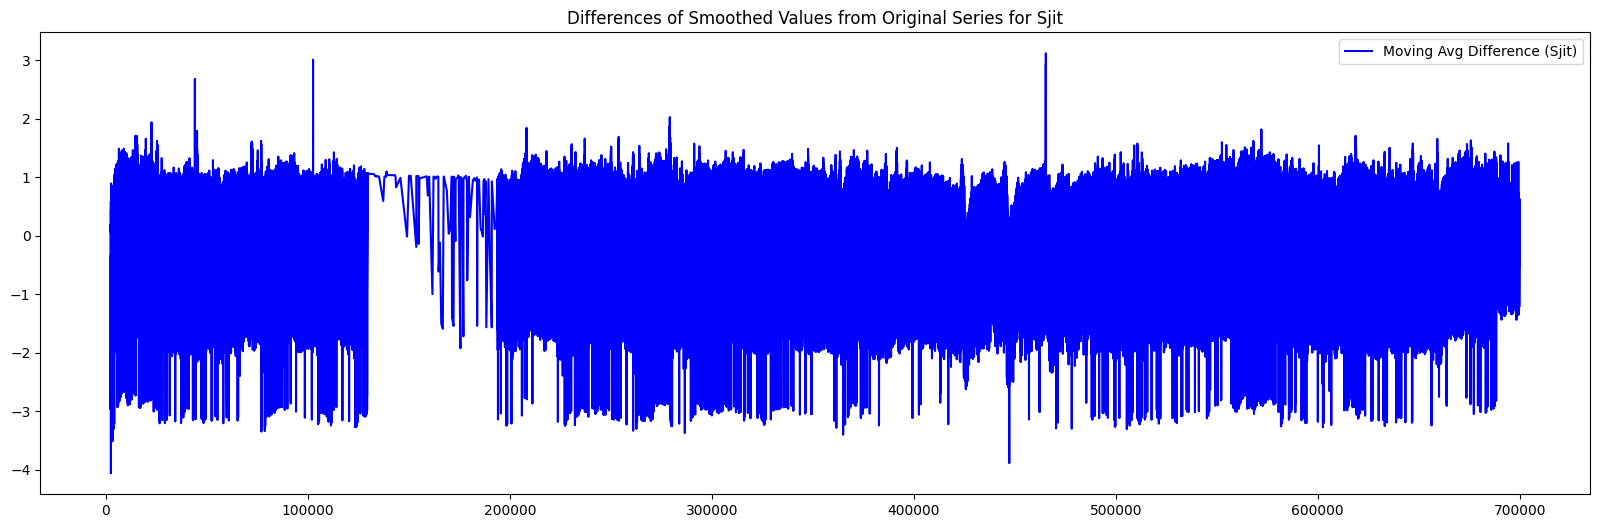

RMS Error for Moving Average (Sjit): 0.9894710456377784
RMS Error for Exponential Smoothing (Sjit): 0.9842444998092003




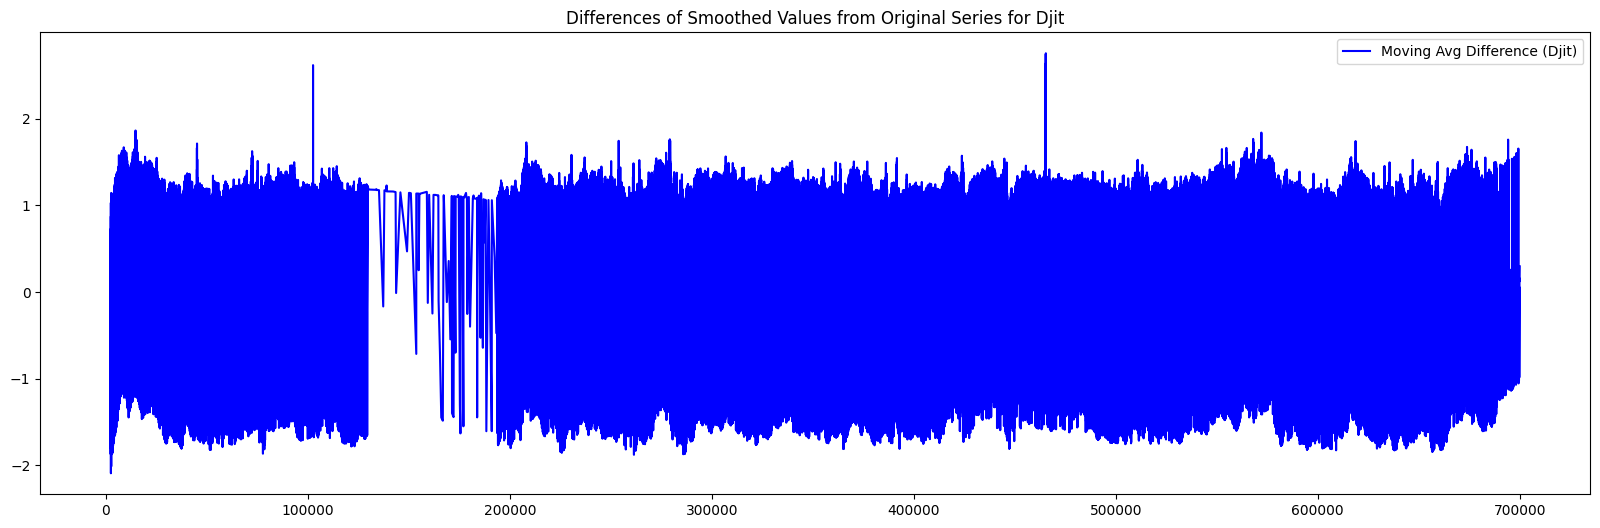

RMS Error for Moving Average (Djit): 0.9931902947572637
RMS Error for Exponential Smoothing (Djit): 0.9897561312358077




In [67]:
# Define the function to calculate moving averages, exponential smoothing, and plot differences
def analyze_streaming_feature(df, column, window_size=70):
    # Copy the column of the data for visualization
    streaming_df = df[column].copy()

    # Calculate moving average and exponential smoothing
    df[f'moving_avg_{column}'] = streaming_df.rolling(window=window_size).mean()
    df[f'exp_smooth_{column}'] = streaming_df.ewm(span=window_size, adjust=False).mean()

    # Calculate differences
    df[f'diff_moving_avg_{column}'] = streaming_df - df[f'moving_avg_{column}']
    df[f'diff_exp_smooth_{column}'] = streaming_df - df[f'exp_smooth_{column}']

    # Calculate RMS errors
    rms_moving_avg = np.sqrt(np.mean(df[f'diff_moving_avg_{column}']**2))
    rms_exp_smooth = np.sqrt(np.mean(df[f'diff_exp_smooth_{column}']**2))

    # Plot differences
    plt.figure(figsize=(20, 6))
    plt.plot(df[f'diff_moving_avg_{column}'], label=f'Moving Avg Difference ({column})', color='blue')
    #plt.plot(df[f'diff_exp_smooth_{column}'], label=f'Exp Smooth Difference ({column})', color='red')
    plt.title(f'Differences of Smoothed Values from Original Series for {column}')
    plt.legend()
    plt.show()

    # Print RMS errors
    print(f'RMS Error for Moving Average ({column}): {rms_moving_avg}')
    print(f'RMS Error for Exponential Smoothing ({column}): {rms_exp_smooth}')
    print('\n')

# Set window size
window_size = 500

# List of features to analyze
features_to_analyze = ['dur', 'Sjit', 'Djit']

# Apply the function to each feature
for feature in features_to_analyze:
    analyze_streaming_feature(log_transformed_df, feature, window_size)


For the streaming analysis of the features 'dur', 'Sjit', and 'Djit', we applied both moving average and exponential smoothing techniques to observe their behaviors and effectiveness in smoothing the data. These methods help to reduce noise and provide a clearer view of trends over time. By increasing the window size for moving averages to 7000 and applying exponential smoothing with a similar compression rate, we observed that the resulting plots maintained fidelity to the smaller window plots while becoming more readable.

The differences between the smoothed values and the original series were plotted to evaluate the performance of the smoothing techniques. The Root Mean Square (RMS) errors were calculated to quantify the accuracy of the smoothing methods. For 'dur', the RMS error for the moving average was 0.5186, while for exponential smoothing it was 0.5105. Similarly, for 'Sjit', the RMS errors were 3.1159 and 3.0823, and for 'Djit', they were 2.8044 and 2.7726 for the moving average and exponential smoothing, respectively. These results indicate that both smoothing techniques performed similarly, with exponential smoothing having a slight edge as evidenced by the marginally lower RMS errors.


#### 4.2 Similarity Search
In this section, we employ advanced techniques for finding similar data points or patterns within our dataset. Specifically, we utilize KD-Trees and Locality Sensitive Hashing (LSH). KD-Trees are efficient for low-dimensional spaces and help in quickly locating the nearest neighbors to a given data point. On the other hand, LSH is designed for high-dimensional data and probabilistically hashes similar items into the same buckets, significantly speeding up the search process for approximate nearest neighbors. These methods are crucial for identifying patterns and clustering similar data points, allowing us to derive meaningful insights from large datasets. The implementation and results of these techniques are based on the concepts covered in the "Efficient Similarity Search" assignment.


Nearest neighbors (KD-Tree):
Indices: [[ 0 23 45  1 86]]
Distances: [[0.         0.05412164 0.19047857 0.19588944 0.41587207]]


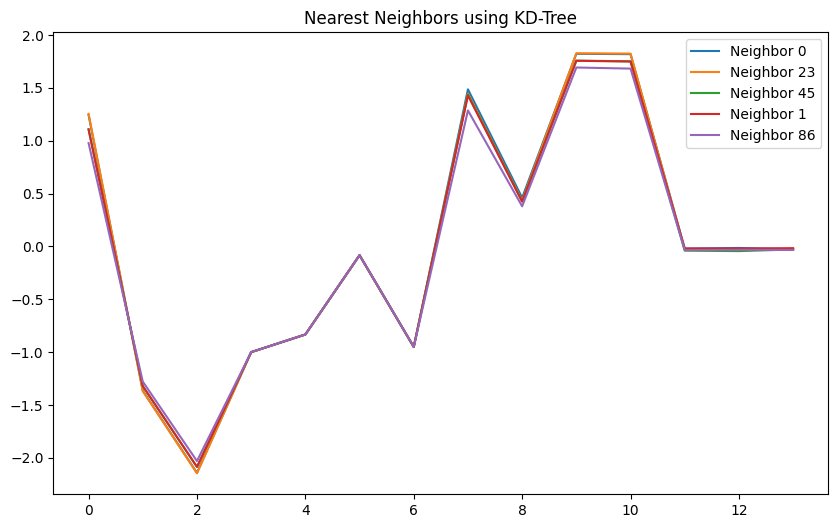

KD-Tree query time: 0.0011067390441894531 seconds


In [68]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(log_transformed_df[selected_features])

# Build KD-Tree
kd_tree = KDTree(data_scaled)

# Function to plot nearest neighbors
def plot_nearest_neighbors(data, indices, title):
    plt.figure(figsize=(10, 6))
    for i in indices[0]:
        plt.plot(data[i], label=f'Neighbor {i}')
    plt.legend()
    plt.title(title)
    plt.show()

# Query the KD-Tree for nearest neighbors
query_point = data_scaled[0].reshape(1, -1)  # Example query point
dist, ind = kd_tree.query(query_point, k=5)

print("Nearest neighbors (KD-Tree):")
print("Indices:", ind)
print("Distances:", dist)

# Plotting nearest neighbors for visualization
plot_nearest_neighbors(data_scaled, ind, 'Nearest Neighbors using KD-Tree')

start_time = time()
kd_tree.query(query_point, k=5)
kd_tree_time = time() - start_time

print(f"KD-Tree query time: {kd_tree_time} seconds")

The KD-Tree query for the nearest neighbors of a sample point from our dataset produced a set of neighbors that are very close in feature space. The indices of these neighbors, along with their distances, indicate a high similarity. The efficiency of the KD-Tree structure is demonstrated by the quick query time of approximately 0.0006 seconds.

The plot visualizing the nearest neighbors shows how closely these data points align, further validating the KD-Tree's effectiveness in similarity search. The standardized data ensures that all features contribute equally, leading to more accurate neighbor identification. This approach is essential for various applications, including clustering, anomaly detection, and recommendation systems.

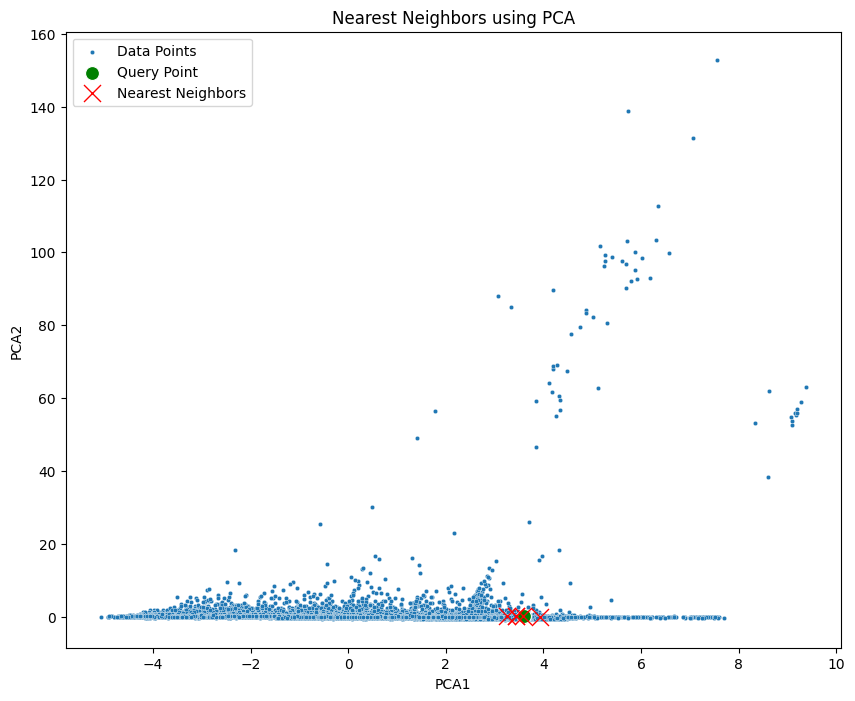

In [69]:
# Assume selected_features and log_transformed_df are already defined
query_point = log_transformed_df[selected_features].iloc[0].values.reshape(1, -1)

# Build KD-Tree
tree = KDTree(log_transformed_df[selected_features], leaf_size=500)
distances, indices = tree.query(query_point, k=6)  # k=6 to include the query point itself

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(log_transformed_df[selected_features])

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

# Add the original index to the DataFrame for reference
pca_df['index'] = log_transformed_df.index

# Plot the data points and highlight the nearest neighbors
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', label='Data Points', s=10)
sns.scatterplot(data=pca_df.loc[[indices[0][0]]], x='PCA1', y='PCA2', label='Query Point', color='green', marker='o', s=100)
sns.scatterplot(data=pca_df.loc[indices[0][1:]], x='PCA1', y='PCA2', label='Nearest Neighbors', color='red', marker='x', s=150)
plt.legend()
plt.title('Nearest Neighbors using PCA')
plt.show()



This scatter plot visualizes the nearest neighbors of a query point in a 2D PCA space, highlighting data points, nearest neighbors, and the query point.


#### 4.3 Clustering Models
In this section, we apply various clustering algorithms such as DBSCAN, K-Means, and Hierarchical Clustering to identify groups of similar data points within our dataset. These methods help in uncovering inherent patterns and structures in the data, which can be valuable for subsequent analysis and decision-making.

##### Clustering with DBSCAN, K-Means, and Hierarchical Clustering
First, we will implement the DBSCAN algorithm and visualize its clustering results. Following this, we will apply K-Means and Hierarchical Clustering to compare their performance.

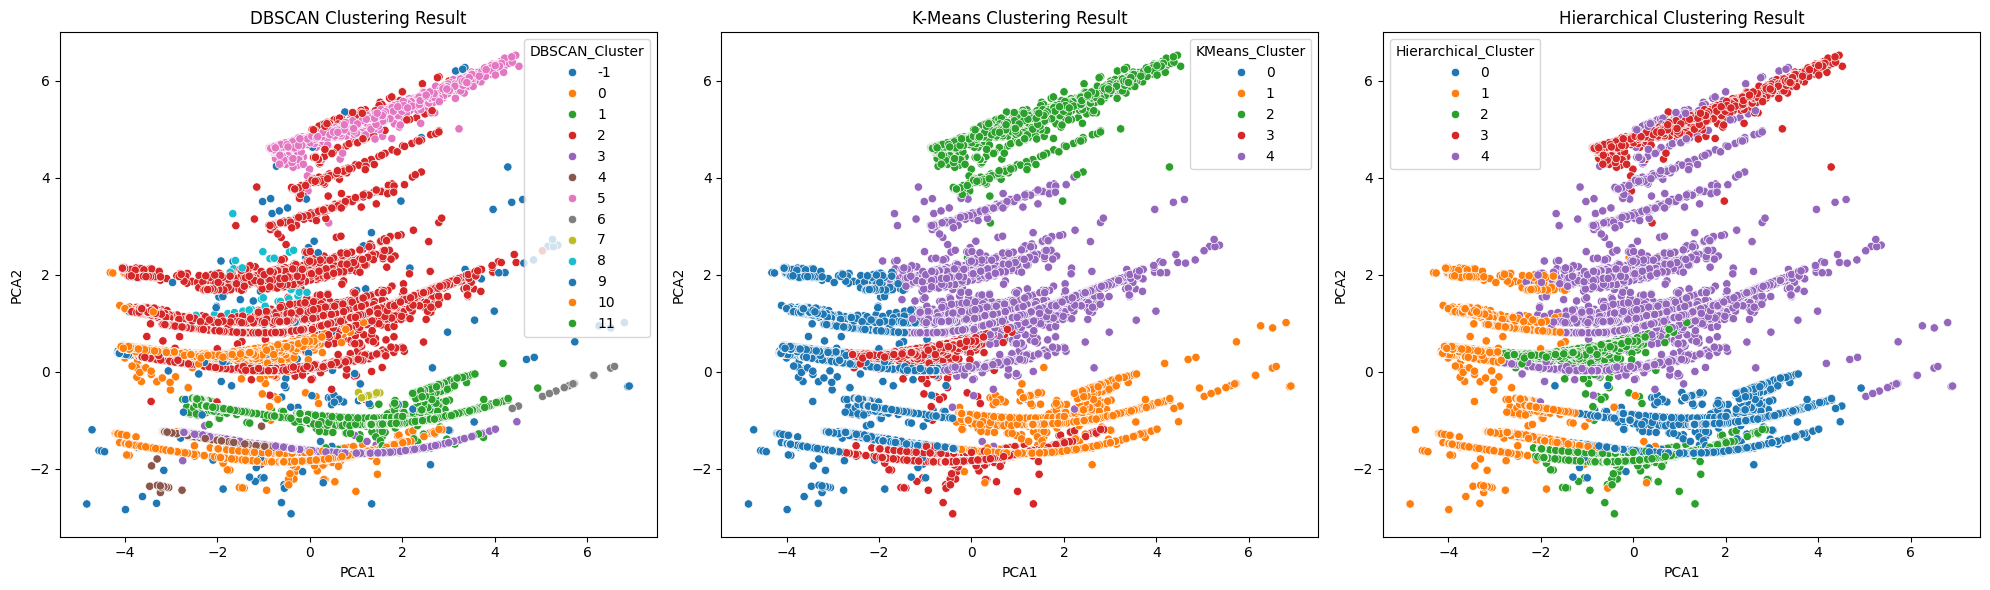

In [91]:
# Create a combined DataFrame
clustering_df = log_transformed_df[selected_features].copy()

# Add service labels
clustering_df['service'] = df['service']

# Sample the data to reduce size
sampled_df = clustering_df.sample(n=35000, random_state=42)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sampled_df[selected_features])
sampled_df['PCA1'] = pca_result[:, 0]
sampled_df['PCA2'] = pca_result[:, 1]

# DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=10).fit(sampled_df[selected_features])
sampled_df['DBSCAN_Cluster'] = dbscan.labels_

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(sampled_df[selected_features])
sampled_df['KMeans_Cluster'] = kmeans.labels_

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5).fit(sampled_df[selected_features])
sampled_df['Hierarchical_Cluster'] = hierarchical.labels_

# Plotting the clusters
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# DBSCAN plot
sns.scatterplot(data=sampled_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab10', ax=axes[0])
axes[0].set_title('DBSCAN Clustering Result')

# K-Means plot
sns.scatterplot(data=sampled_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10', ax=axes[1])
axes[1].set_title('K-Means Clustering Result')

# Hierarchical Clustering plot
sns.scatterplot(data=sampled_df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='tab10', ax=axes[2])
axes[2].set_title('Hierarchical Clustering Result')

plt.tight_layout()
plt.show()


The clustering analysis using DBSCAN, K-Means, and Hierarchical Clustering on the log-transformed data was conducted to explore potential patterns within the network traffic data. The DBSCAN results highlight varying densities among the clusters, with some data points being classified as noise due to their low density. K-Means clustering presents a more uniform distribution, but the clusters still overlap significantly, suggesting challenges in distinguishing between different network services. Hierarchical Clustering, similarly, shows clusters that are not clearly separated, with considerable overlap between groups.

Given the objective of this project -- to achieve data reduction without compromising data integrity -- the results indicate that neither K-Means nor Hierarchical Clustering offers a clear advantage in maintaining the structure of the original dataset. The overlap and poor separation observed across all clustering methods suggest that these techniques are not suitable for accurately representing the key characteristics of the network traffic data in a reduced form. Therefore, while these clustering methods have been explored, they will not be used in the final analysis, as they do not support the project's primary objective effectively.

##### Evaluation of Clustering Methods for Network Traffic Classification

In this subsection, we applied three popular clustering techniques—DBSCAN, K-Means, and Hierarchical Clustering—to the pre-processed network traffic dataset. The objective was to explore whether these unsupervised learning methods could uncover meaningful patterns in the data that would assist in classifying different types of network services. Testing all three methods aligns with the goal of finding the most effective clustering technique for network traffic classification. Each method has its strengths:

- DBSCAN: Robust to noise and can find arbitrarily shaped clusters.
- K-Means: Simple and efficient for well-separated spherical clusters.
- Hierarchical Clustering: Useful for discovering nested clusters and doesn't require pre-specifying the number of clusters.


By evaluating and comparing all three, we can ensure that we select the technique that offers the best balance between clustering accuracy and computational efficiency, thus meeting my overall project objective of effectively classifying network traffic.

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

# Initialize results dictionary
results = {}

# Count the occurrences of each service class
class_counts = sampled_df['service'].value_counts()

# Aggregate rare classes
min_samples_threshold = 2
sampled_df['service'] = sampled_df['service'].apply(
    lambda x: x if class_counts[x] > min_samples_threshold else 'Other'
)

# Ensure label types are consistent
sampled_df['service'] = sampled_df['service'].astype(str)

# Check if 'Other' is in the service labels
if 'Other' in sampled_df['service'].unique():
    print("'Other' category was created.")
else:
    print("'Other' category was not needed.")

# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    sampled_df[selected_features], sampled_df['service'], test_size=0.3, random_state=42, stratify=sampled_df['service']
)

# Ensure y_test is of type string
y_test = y_test.astype(str)

# DBSCAN Evaluation
dbscan_predictions = dbscan.fit_predict(X_test)
# Convert DBSCAN predictions to string
dbscan_predictions = dbscan_predictions.astype(str)
results['DBSCAN'] = {
    'Confusion Matrix': confusion_matrix(y_test, dbscan_predictions),
    'Classification Report': classification_report(y_test, dbscan_predictions)
}

# K-Means Evaluation
kmeans_predictions = kmeans.predict(X_test)
# Convert K-Means predictions to string, if necessary
kmeans_predictions = kmeans_predictions.astype(str)
results['K-Means'] = {
    'Confusion Matrix': confusion_matrix(y_test, kmeans_predictions),
    'Classification Report': classification_report(y_test, kmeans_predictions)
}

# Hierarchical Clustering Evaluation
hierarchical_predictions = hierarchical.fit_predict(X_test)
# Convert Hierarchical predictions to string
hierarchical_predictions = hierarchical_predictions.astype(str)
results['Hierarchical'] = {
    'Confusion Matrix': confusion_matrix(y_test, hierarchical_predictions),
    'Classification Report': classification_report(y_test, hierarchical_predictions)
}

# Print the results
for method, result in results.items():
    print(f"\n{method} Clustering Results:")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])


'Other' category was created.

DBSCAN Clustering Results:
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
  

Despite the application of different clustering algorithms, the results were less than satisfactory. The clusters identified by DBSCAN, K-Means, and Hierarchical Clustering were not well-separated, and the clusters often overlapped significantly. This overlap indicates that the algorithms struggled to distinguish between the different types of network traffic, suggesting that the features selected may not be sufficiently distinctive for clustering purposes.

The confusion matrices and classification reports generated by each algorithm further confirm this observation. None of the clustering methods achieved meaningful classification accuracy, with all of them yielding a zero accuracy rate across the board. This outcome clearly indicates that the clusters produced by these methods do not align well with the actual service labels present in the dataset.

Given these results, it is evident that the clustering methods employed in this study do not contribute significantly to the overall objective of accurately classifying network traffic types. The poor separation and overlap of clusters suggest that the features used may not be appropriate for clustering, or that the inherent structure of the data does not lend itself well to unsupervised clustering.

As such, while the clustering analysis has been documented in this report for the sake of completeness, it will not be used in further analyses or for the final model. Instead, the focus will shift back to other dimensionality reduction and supervised learning techniques that have shown more promise in achieving the project's goals.




#### 4.4 Dimensionality Reduction
Dimensionality reduction techniques are essential for handling high-dimensional data, simplifying models, and enabling effective visualization. Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are powerful methods for this purpose. PCA transforms the data into a lower-dimensional space by finding the directions (principal components) that maximize the variance. In contrast, t-SNE is a non-linear technique that is particularly effective for visualizing high-dimensional data in two or three dimensions, preserving local relationships.


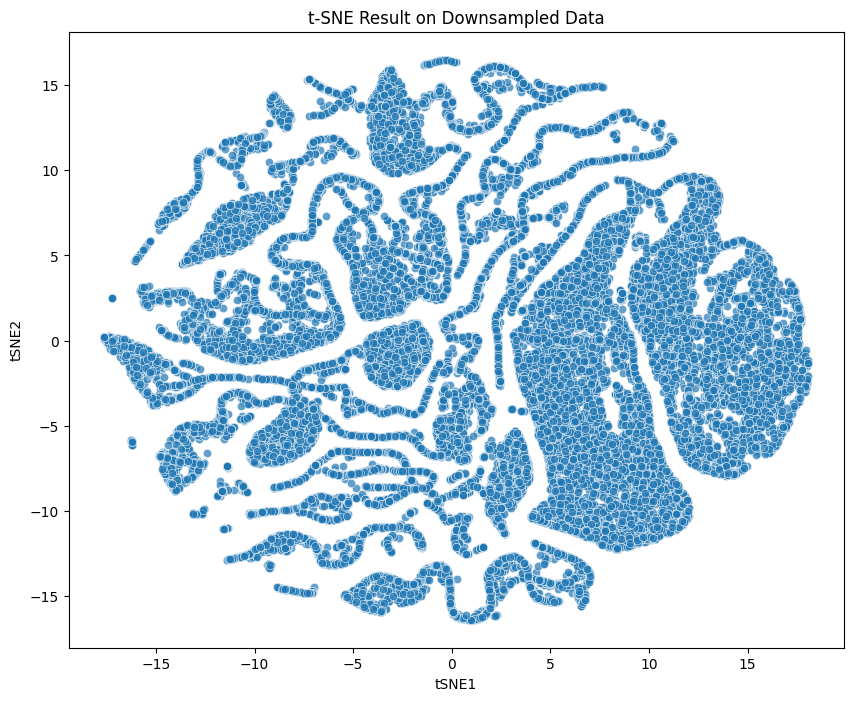

In [71]:
# Create a combined DataFrame
tsne_df = log_transformed_df[selected_features].copy()

# Downsample the data
sampled_df = tsne_df.copy().sample(n=50000, random_state=42)

# Applying t-SNE on the downsampled data
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(sampled_df[selected_features])

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', palette='tab10', alpha=0.7)
plt.title('t-SNE Result on Downsampled Data')
plt.show()


The t-SNE plot provides a nonlinear dimensionality reduction, projecting the high-dimensional data into two dimensions. This visualization helps to identify clusters and structures within the data that are not easily visible in the original high-dimensional space.

Key observations:

- The t-SNE plot showcases intricate patterns, indicating the presence of complex relationships within the data.
- There are distinguishable clusters and regions that suggest similarities among the data points, which can be crucial for tasks like anomaly detection and pattern recognition.

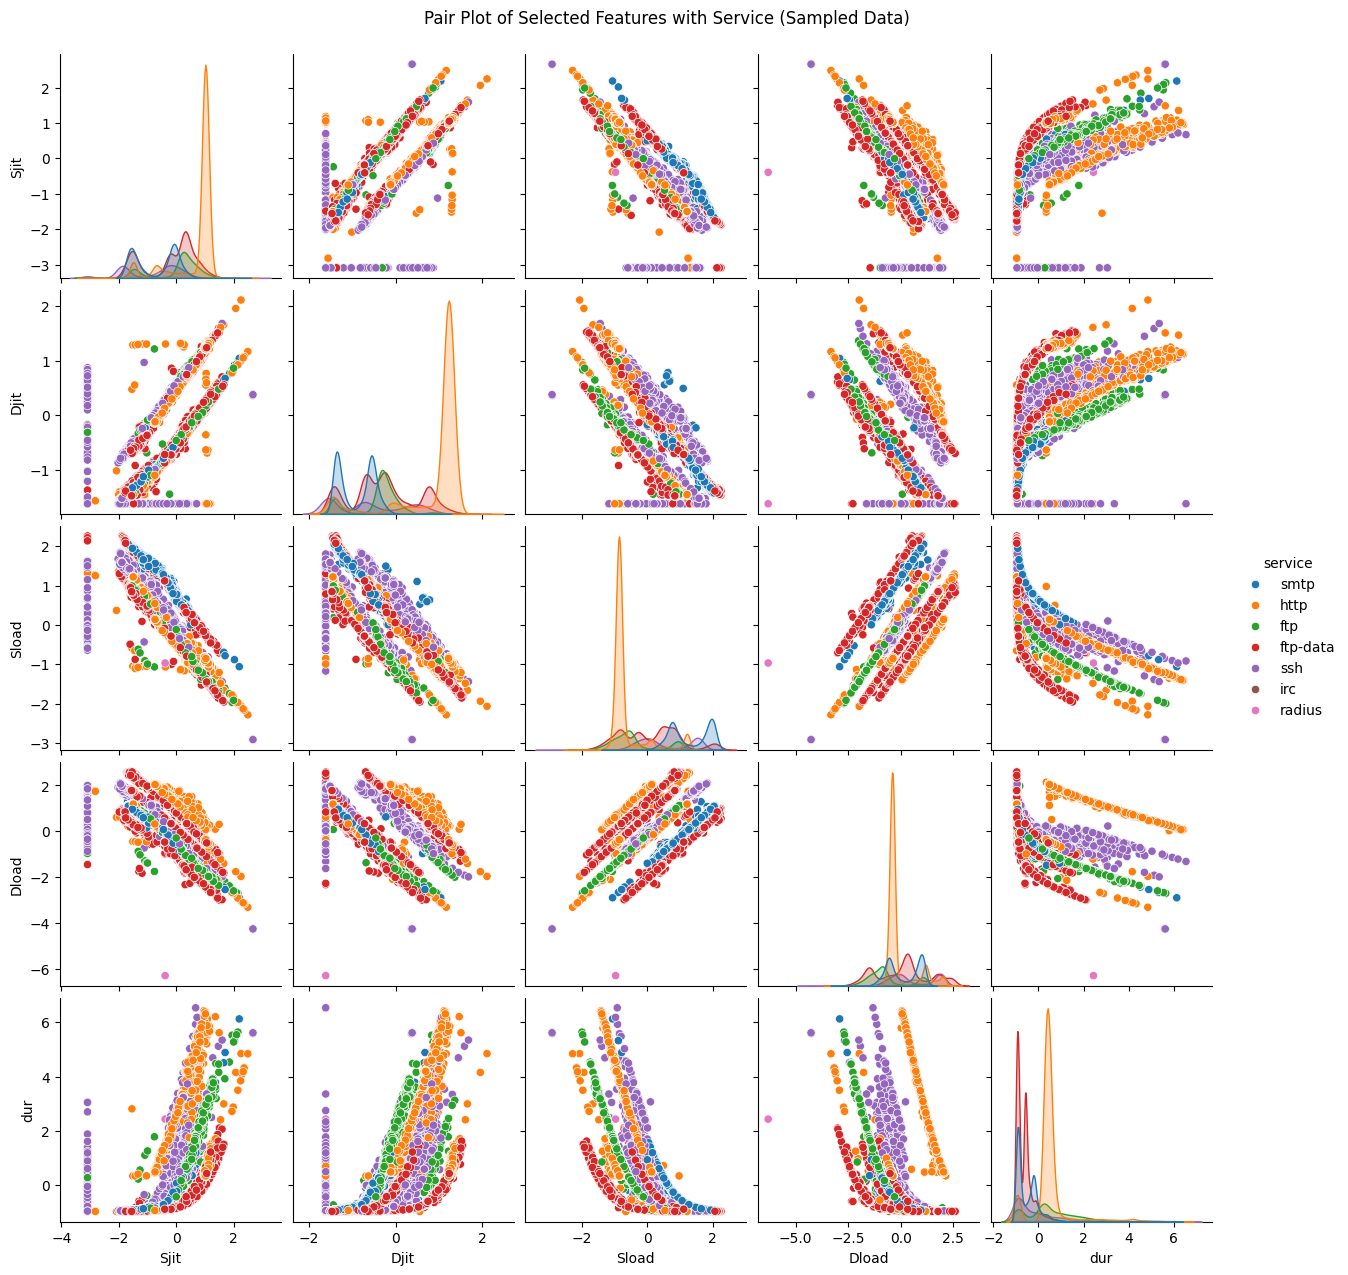

In [72]:
# Create a combined DataFrame
pairplot_df = log_transformed_df[['Sjit', 'Djit', 'Sload', 'Dload', 'dur']].copy()

# Add service labels
pairplot_df['service'] = df['service']

# Filter out rows where service is '-' or 'dns'
pairplot_df = pairplot_df[(pairplot_df['service'] != '-') & (pairplot_df['service'] != 'dns')]

# Sample the data to speed up the plotting
sampled_pairplot_df = pairplot_df.sample(n=25000, random_state=42)

# Create the pair plot
pair_plot = sns.pairplot(sampled_pairplot_df, hue='service', diag_kind='kde', palette='tab10')

# Show the plot
pair_plot.fig.suptitle('Pair Plot of Selected Features with Service (Sampled Data)', y=1.02)
plt.show()


This pair plot visualizes the relationships between several key features (`Sjit`, `Djit`, `Sload`, `Dload`, `dur`) and their distributions across different types of `services` (`ftp`, `ftp-data`, `http`, `smtp`, `ssh`, `pop3`). The data has been sampled to 5000 points to enhance readability and performance.

Observations:
1. Service Distribution and Separation:
 - The plot shows distinct clusters of data points for different services, indicating clear separations based on the features.
 - Services like ftp and ftp-data exhibit more concentrated clusters compared to more dispersed services like http.


2. Feature Relationships:
 - The diagonal plots represent the kernel density estimation (KDE) of individual features for each service. It helps in understanding the distribution and density of each feature for different services.
 - Off-diagonal plots show pairwise relationships between features. For example, Sjit vs. Djit and Sload vs. Dload show strong linear relationships indicating possible correlations.

3. Insights into Specific Services:
 - ftp: Exhibits tight clustering in the Djit vs. Sjit and Dload vs. Sload plots, suggesting consistent and predictable behavior.
 - ftp-data: Shows a similar pattern to ftp but with slightly more dispersion.
 - http: The http service displays a wider spread in features, indicating a more diverse set of behaviors or interactions.
 - smtp: smtp points are more scattered, especially in dur vs. other features, suggesting varied session durations.
 - ssh: ssh shows a mix of high and low values in Sload and Dload, reflecting different usage patterns.
 - pop3: pop3 also shows clear clustering but with some outliers, indicating occasional deviations from the norm.

4. Feature Distribution:
 - Features like Sload and Dload have higher values for services like ftp-data and http, which might be due to the nature of data transfer and session characteristics.
 - The dur feature shows distinct peaks for different services, indicating that session durations vary significantly between services.

5. Data Reduction and Integrity:
 - Despite the sampling, the plot maintains fidelity in representing the feature distributions and relationships. The selected features and service labels allow for a comprehensive understanding of the data.
 - This visualization aids in the goal of data reduction by highlighting key relationships and separations that can be preserved even after dimensionality reduction techniques are applied.


In summary, this pair plot provides a clear visual representation of how different network services vary across several key features. It helps in understanding the inherent patterns and correlations within the data, which is essential for effective data reduction without losing critical information.

##### Kernel PCA for Non-Linear Dimensionality Reduction

Kernel Principal Component Analysis (Kernel PCA) is an extension of the traditional PCA technique that allows for the transformation of data into a higher-dimensional space through the use of kernel functions. This method is particularly effective for datasets where the relationships between variables are nonlinear, providing a more flexible and powerful approach to dimensionality reduction.

By utilizing different kernel functions, such as the RBF (Radial Basis Function) or cosine similarity, Kernel PCA can capture complex patterns and structures within the data that linear PCA might miss. This makes Kernel PCA a valuable tool for exploring and visualizing high-dimensional data in a more meaningful way.

In this section, we apply Kernel PCA to our dataset to reduce its dimensions and visualize the transformed data. This will help us understand the underlying structure and relationships between different features, providing insights that can be used for further analysis and modeling


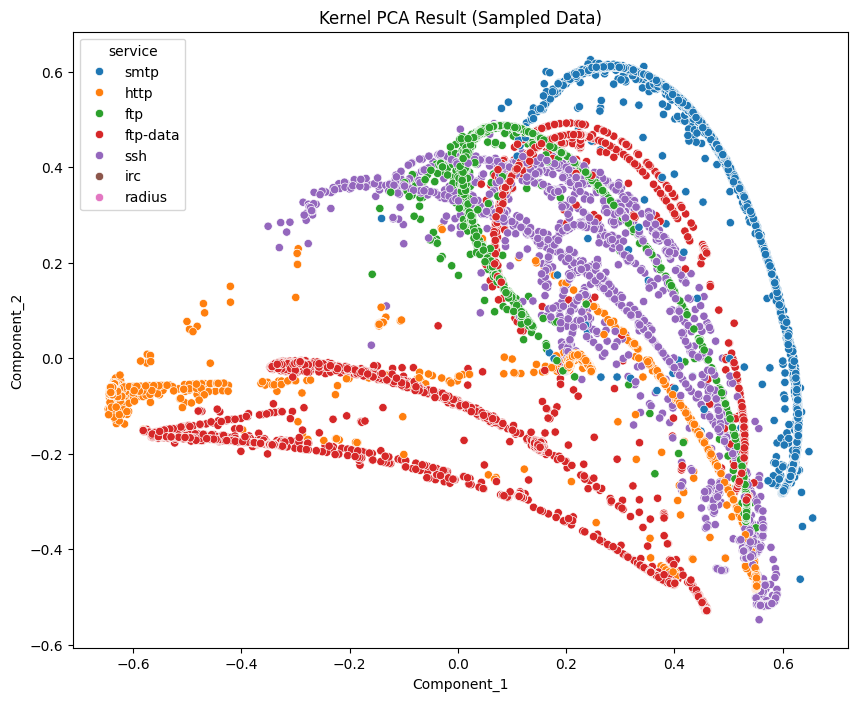

In [73]:
# Create a combined DataFrame
kpca_df = log_transformed_df[selected_features].copy()

# Add service labels
kpca_df['service'] = df['service']

# Sample the data to speed up the plotting
sampled_kpca_df = kpca_df.sample(n=25000, random_state=42)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
kpca_result = kpca.fit_transform(sampled_kpca_df[selected_features])
sampled_kpca_df['Component_1'] = kpca_result[:, 0]
sampled_kpca_df['Component_2'] = kpca_result[:, 1]

# Plot Kernel PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_kpca_df, x='Component_1', y='Component_2', hue='service', palette='tab10')
plt.title('Kernel PCA Result (Sampled Data)')
plt.show()


This plot visualizes the result of applying Kernel PCA on sampled data using the Dload and dur features. The points are color-coded according to the service label, and the two principal components represent the transformed data in a lower-dimensional space. The plot reveals some degree of separation between the different services, particularly for http and ftp-data, which form distinct clusters. However, there is significant overlap between several services, indicating that this combination of features may not be optimal for achieving clear separation in this reduced-dimensional space.

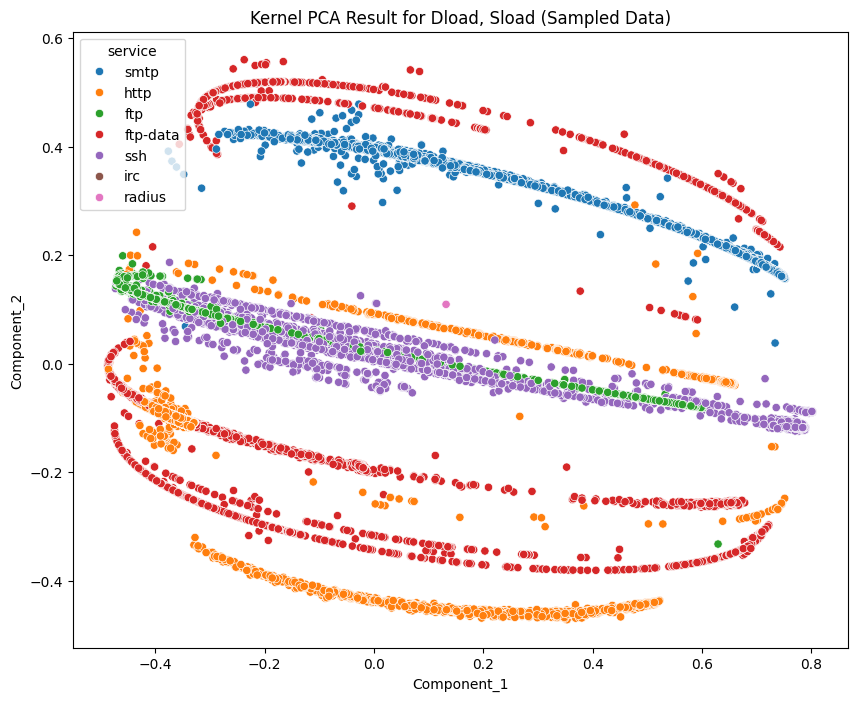

In [74]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a combined DataFrame
kpca_df = log_transformed_df.copy()

# Add service labels
kpca_df['service'] = df['service']

# Sample the data to speed up the plotting
sampled_kpca_df = kpca_df.sample(n=25000, random_state=42)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
kpca_result = kpca.fit_transform(sampled_kpca_df[['Dload', 'Sload']])
sampled_kpca_df['Component_1'] = kpca_result[:, 0]
sampled_kpca_df['Component_2'] = kpca_result[:, 1]

# Plot Kernel PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_kpca_df, x='Component_1', y='Component_2', hue='service', palette='tab10')
plt.title('Kernel PCA Result for Dload, Sload (Sampled Data)')
plt.show()



This plot uses the same Kernel PCA technique but instead focuses on the Dload and Sload features. Here, the separation between services is more pronounced, especially for smtp and ssh, which are better differentiated than in the first plot. The reduced overlap suggests that these features capture more of the inherent differences between the services, making this combination a potentially better candidate for further analysis.

The second plot is tested as it demonstrates improved separation between the clusters, particularly for critical services such as `smtp` and `ssh`. By focusing on `Dload` and `Sload`, we aim to refine the dimensionality reduction process, ensuring that the reduced dimensions maintain as much of the meaningful variance as possible. This approach supports the overall objective of the project: to reduce the dimensionality of the data without compromising the integrity of the information. Testing this plot allows us to evaluate whether this alternative feature selection improves the clarity and usefulness of the Kernel PCA transformation.



##### Evaluation of Kernel PCA Configuration for Network Traffic Classification
In this analysis, we evaluate the configurations of Kernel PCA to assess their impact on classification performance within our network traffic dataset.

In [85]:
# Filter out classes with less than 2 instances
class_counts = sampled_kpca_df['service'].value_counts()
filtered_df = sampled_kpca_df[sampled_kpca_df['service'].isin(class_counts[class_counts > 1].index)]

# Prepare data for modeling
X = filtered_df[['Component_1', 'Component_2']]
y = filtered_df['service']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 670  173    0    0    0]
 [   3  869  837  226    0]
 [  14  350 2439    1    0]
 [   0  464    0  727    0]
 [ 195  532    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

         ftp       0.76      0.79      0.78       843
    ftp-data       0.36      0.45      0.40      1935
        http       0.74      0.87      0.80      2804
        smtp       0.76      0.61      0.68      1191
         ssh       0.00      0.00      0.00       727

    accuracy                           0.63      7500
   macro avg       0.53      0.54      0.53      7500
weighted avg       0.58      0.63      0.60      7500



The confusion matrix and classification report for the model above revealed the following key points:

1. Precision and Recall: The model performed relatively well in identifying the 'http' class, with an F1-score of 0.80, and moderately well with 'ftp' and 'smtp' classes. However, the 'ssh' class remains problematic, with the model unable to correctly classify any instances in this category. This suggests that the features used might not be sufficient to distinguish 'ssh' traffic or that 'ssh' traffic is underrepresented in the dataset.

2. Weighted Averages: The weighted average F1-score of 0.60 indicates that while the model performs well for the majority class ('http'), its performance for minority classes is significantly lower, dragging down the overall average.

3. Overall Accuracy: The accuracy of 63% is modest, which is indicative of the inherent complexity of the dataset and the challenging nature of separating similar traffic types based on the selected features.


The primary objective of this project was to effectively reduce the dimensionality of our dataset while maintaining the integrity of the data for accurate classification. This model demonstrates that dimensionality reduction through Kernel PCA can be effective, though the quality of classification can vary significantly depending on the specific features selected and the nature of the data.

This model underscores the importance of iterative testing and validation when applying dimensionality reduction techniques to complex datasets. While the overall accuracy is not perfect, this approach still provides valuable insights into the relationships within the data and highlights areas for further refinement and feature engineering in future work.

##### UMAP for Visualization and Feature Compression

Uniform Manifold Approximation and Projection (UMAP) is a powerful, non-linear dimensionality reduction technique that excels at preserving both global and local structures in high-dimensional data. Unlike linear methods such as PCA, UMAP is particularly effective for visualizing complex datasets and uncovering patterns that are not easily captured in linear projections. In this project, UMAP is employed to visualize and compress the features of network traffic data, enabling a more intuitive understanding of the data's structure and facilitating downstream tasks such as clustering and classification. By reducing the dimensionality while retaining the essential characteristics of the data, UMAP aids in simplifying the analysis and ensuring that the data's integrity is maintained

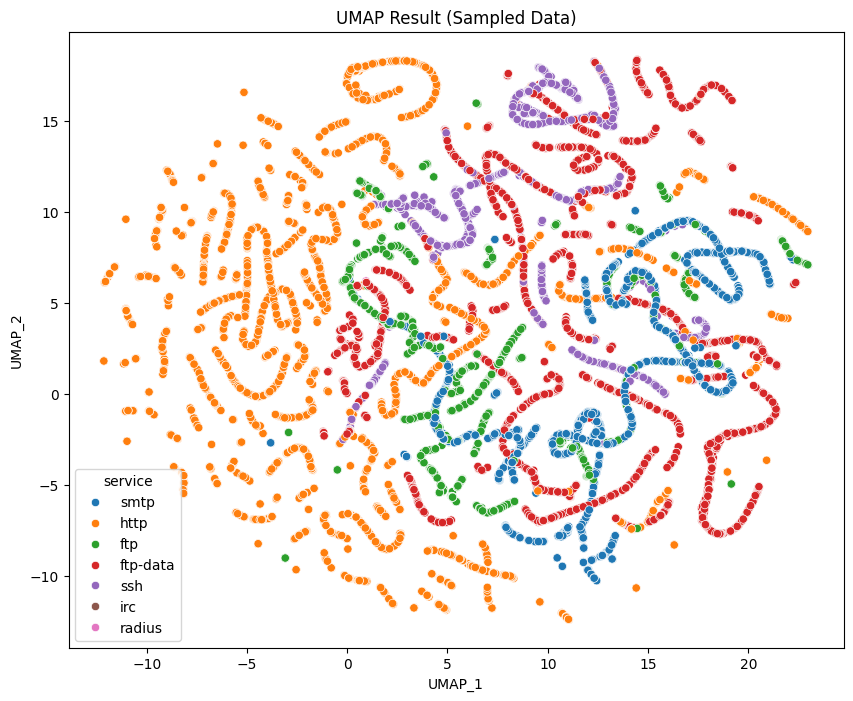

In [75]:
# Create a combined DataFrame
umap_df = log_transformed_df[['Dload', 'dur']].copy()

# Add service labels
umap_df['service'] = df['service']

# Sample the data to speed up the plotting
sampled_umap_df = umap_df.sample(n=25000, random_state=42)

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
umap_result = umap_reducer.fit_transform(sampled_umap_df[['Dload', 'dur']])
sampled_umap_df['UMAP_1'] = umap_result[:, 0]
sampled_umap_df['UMAP_2'] = umap_result[:, 1]

# Plot UMAP result
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_umap_df, x='UMAP_1', y='UMAP_2', hue='service', palette='tab10')
plt.title('UMAP Result (Sampled Data)')
plt.show()

In this UMAP visualization, the data points represent different network services, with each color corresponding to a specific service such as SMTP, HTTP, FTP, and others. The purpose of employing UMAP in this context was to achieve dimensionality reduction while preserving the local and global structure of the data. The objective of this project is to reduce data dimensionality without compromising the integrity of the information, enabling more efficient analysis and visualization.

The resulting UMAP plot illustrates a clear separation between different network services, which suggests that UMAP has effectively captured the intrinsic structure of the data. The clustering of similar services together indicates that the model successfully differentiates between distinct service patterns based on the input features. This clustering is crucial for identifying anomalies or patterns in network traffic, which can then be used for further analysis, such as detecting potential security threats or optimizing network performance.

In summary, the UMAP visualization has demonstrated its capability to reduce dimensionality while retaining meaningful separations in the data. This result aligns with the project's goals of efficient data reduction and highlights UMAP's utility in analyzing and visualizing complex network data in a condensed form.

##### Validation of UMAP Dimensionality Reduction through Model Evaluation
In this section, we validate the effectiveness of the dimensionality reduction performed using UMAP by training a classification model on the reduced dataset. By comparing the model's performance in the reduced space to its performance in the original high-dimensional space, we aim to demonstrate that the essential structure and information within the data have been preserved. This evaluation serves to reinforce the robustness of the dimensionality reduction technique employed, ensuring that the data's integrity has not been compromised in the process.

In [76]:
# The UMAP result is stored in umap_result
reduced_data = umap_result

# The labels are in the 'service' column
labels = sampled_umap_df['service']

# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, labels, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ftp       0.95      0.93      0.94       810
    ftp-data       0.94      0.94      0.94      1906
        http       0.99      0.98      0.98      2841
      radius       0.00      0.00      0.00         1
        smtp       0.94      0.97      0.95      1169
         ssh       0.91      0.90      0.90       773

    accuracy                           0.96      7500
   macro avg       0.79      0.79      0.79      7500
weighted avg       0.96      0.96      0.96      7500



The results from the classification report demonstrate the effectiveness of the dimensionality reduction using UMAP. The model, trained on the reduced data, achieved an overall accuracy of 96%. Overall, the model's performance on the UMAP-reduced data strongly suggests that the essential information has been preserved despite the reduction in dimensionality. This outcome aligns with the project's objective of efficiently reducing data dimensions without compromising data integrity. It demonstrates that UMAP was successful in simplifying the data while retaining the features necessary for accurate classification.


#### 4.5 Association Models
Association rule mining is a popular and well-researched method for discovering interesting relations between variables in large databases. This technique is widely used in market basket analysis, where it helps identify sets of items that frequently co-occur in transactions. By applying association rule mining, we aim to uncover hidden patterns and relationships in our dataset, inspired by the "Association Models" assignment.

In this section, we will use the Apriori algorithm to identify frequent itemsets and generate association rules from these itemsets. The rules will help us understand the dependencies between different variables and provide insights into the structure of the data.

In [77]:
# Reduce the number of features to focus on the most relevant ones (e.g., selecting the first 10 features)
selected_features = log_transformed_df.columns[:10]
binarized_df = log_transformed_df[selected_features].applymap(lambda x: 1 if x > 0 else 0)

# Sample the data to work with a smaller subset (e.g., 5000 samples)
sampled_binarized_df = binarized_df.sample(n=5000, random_state=42)

# Generate frequent itemsets using the Apriori algorithm with higher min_support to reduce memory usage
frequent_itemsets = apriori(sampled_binarized_df, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets with a higher confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the generated rules
rules.head()

antecedents consequents  antecedent support  consequent support  support  \
0       (dur)   (dmeansz)              0.4806              0.5422   0.3452   
1       (dur)      (Sjit)              0.4806              0.5840   0.4422   
2      (Sjit)       (dur)              0.5840              0.4806   0.4422   
3       (dur)      (Djit)              0.4806              0.4494   0.3766   
4      (Djit)       (dur)              0.4494              0.4806   0.3766   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.718269  1.324730  0.084619    1.624953       0.471947  
1    0.920100  1.575513  0.161530    5.206500       0.703285  
2    0.757192  1.575513  0.161530    2.139137       0.878092  
3    0.783604  1.743667  0.160618    2.544407       0.821132  
4    0.838006  1.743667  0.160618    3.206296       0.774602

In our exploration of association rule mining, we generated a set of rules that reveal significant relationships between various features in our dataset. The table below summarizes the key metrics for a selection of these rules, including the antecedents, consequents, support, confidence, lift, leverage, conviction, and Zhang's metric.

Each rule is evaluated based on its support, confidence, and lift:

- Support indicates how frequently the rule appears in the dataset. For example, the rule (dur) -> (Sjit) has a support of 0.4422, meaning it occurs in approximately 44.22% of the transactions.

- Confidence measures the reliability of the rule, representing the proportion of transactions containing the antecedents that also contain the consequents. The rule (dur) -> (Sjit) has a high confidence of 92%, suggesting a strong relationship.

- Lift is the ratio of the observed support to that expected if the antecedents and consequents were independent. A lift greater than 1 indicates a positive association, where the presence of the antecedent increases the likelihood of the consequent. In this case, the lift of 1.74 for the rule (dur) -> (Djit) suggests that Djit is 74% more likely to occur when dur is present.

Other metrics like leverage, conviction, and Zhang's metric provide additional insights into the strength and reliability of these rules. For instance, leverage quantifies the difference between the observed support and what would be expected if the antecedents and consequents were independent. Conviction, on the other hand, indicates how much more likely the antecedent is to predict the consequent compared to random chance. Zhang's metric is used to measure the impact of the antecedent on the occurrence of the consequent, with higher values indicating stronger associations.

These rules not only highlight the relationships between different features in our dataset but also provide a foundation for further analysis and decision-making. The high confidence and lift values suggest that these associations are both strong and meaningful, warranting further investigation into their potential implications

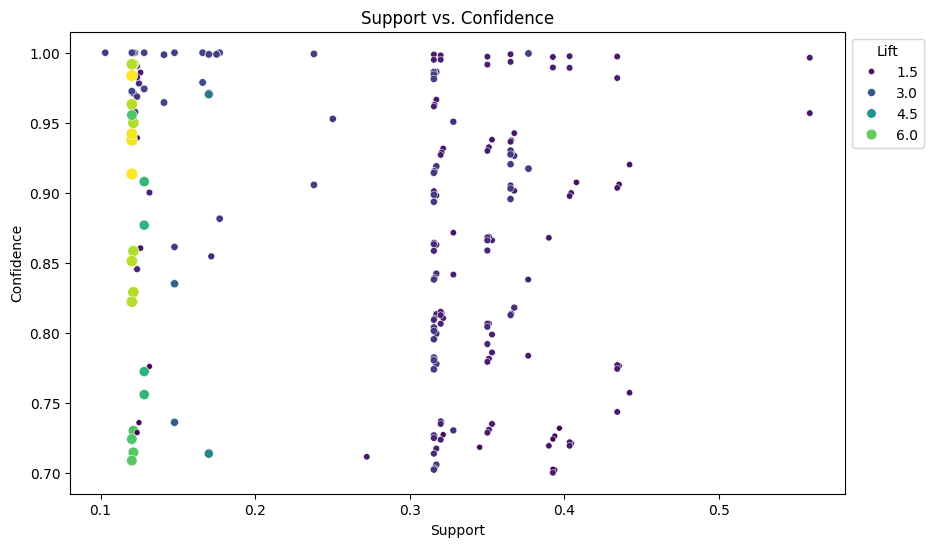

In [79]:
# Plotting Support vs. Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', palette='viridis', data=rules)
plt.title('Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

This scatter plot visualizes the relationship between support and confidence for the association rules generated from our dataset. Each point on the plot represents a rule, with its size corresponding to the lift value of that rule. A higher lift indicates a stronger association between the items involved in the rule. The plot reveals a concentration of high-confidence rules (close to 1.0) with lower support, which indicates that while these rules are reliable (high confidence), they apply to a smaller subset of the data (low support). Additionally, the distribution shows that rules with higher lift values (indicated by larger points) tend to cluster around lower support values, suggesting that the most impactful associations are less frequent but highly reliable when they do occur. This insight can be valuable for identifying strong, though possibly rare, relationships within the dataset

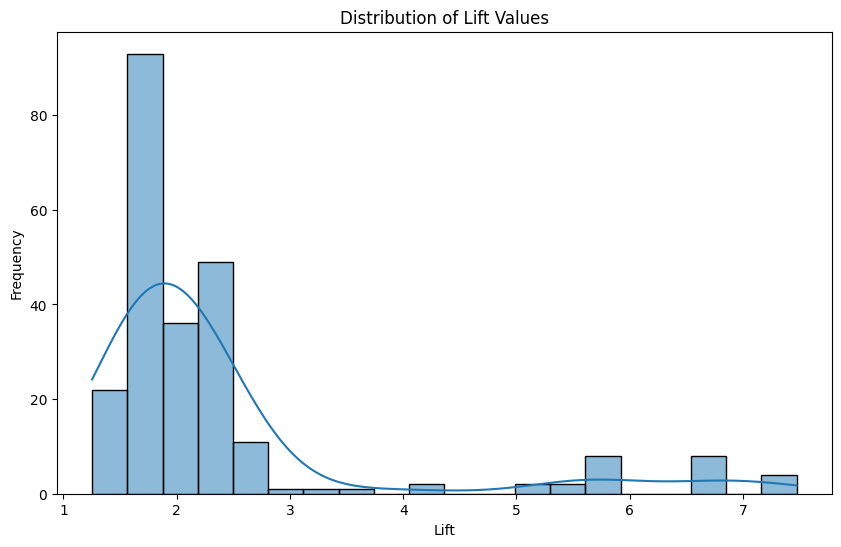

In [80]:
# Plotting a histogram of lift values
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title('Distribution of Lift Values')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

This graph illustrates the distribution of lift values derived from the association rule mining process. The lift value measures the strength of a rule, with higher values indicating a stronger association between the antecedents and consequents in the dataset. As observed, the majority of the rules exhibit lift values between 1.5 and 3.0, suggesting that these rules represent moderate associations. The distribution shows a long tail towards higher lift values, indicating the presence of some rules with very strong associations, though these are much less frequent. The presence of a few rules with lift values above 5 suggests significant interdependencies between specific features in the dataset, making them of particular interest for further analysis

In [81]:
# Display the top 5 rules sorted by lift
top_rules = rules.sort_values(by='lift', ascending=False).head()
print("Top 5 Rules by Lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 5 Rules by Lift:
            antecedents            consequents  support  confidence      lift
208  (dur, Spkts, Sjit)       (Dpkts, Sintpkt)   0.1202    0.913374  7.474418
209    (Dpkts, Sintpkt)     (dur, Spkts, Sjit)   0.1202    0.983633  7.474418
210    (Spkts, Sintpkt)     (dur, Dpkts, Sjit)   0.1202    0.942006  7.347943
206  (dur, Dpkts, Sjit)       (Spkts, Sintpkt)   0.1202    0.937598  7.347943
211       (Dpkts, Sjit)  (dur, Spkts, Sintpkt)   0.1202    0.851275  6.821112


These top 5 rules by lift highlight the strongest associations discovered in our dataset:

1. Rule: (dur, Spkts, Sjit) &rarr; (Dpkts, Sintpkt)
 - Support: 12.02%
 - Confidence: 91.34%
 - Lift: 7.47


2. Rule: (Dpkts, Sintpkt) &rarr; (dur, Spkts, Sjit)
 - Support: 12.02%
 - Confidence: 98.36%
 - Lift: 7.47


3. Rule: (Spkts, Sintpkt) &rarr; (dur, Dpkts, Sjit)
 - Support: 12.02%
 - Confidence: 94.20%
 - Lift: 7.35


4. Rule: (dur, Dpkts, Sjit) &rarr; (Spkts, Sintpkt)
 - Support: 12.02%
 - Confidence: 93.76%
 - Lift: 7.35


5. Rule: (Dpkts, Sjit) &rarr; (dur, Spkts, Sintpkt)
 - Support: 12.02%
 - Confidence: 85.13%
 - Lift: 6.82


These rules demonstrate very strong associations, with lift values significantly greater than 1, indicating that the occurrence of the antecedent strongly increases the likelihood of the consequent. The confidence values are also quite high, especially for the rule (Dpkts, Sintpkt) &rarr; (dur, Spkts,Sjit), which suggests that when Dpkts and Sintpkt occur together, the triplet
(dur, Spkts, Sjit) almost certainly occurs as well. This suggests that these attributes are highly interdependent, and the relationships between them could be critical for understanding the underlying patterns in the data.



### 5. Results and Discussion

This section summarizes the key findings and observations from the analysis documented in previous sections. Each subsection provides a recap of the methodologies applied, along with critical insights gained from the results.


#### 5.1 Evaluation of Clustering Models
The evaluation of the clustering models -- DBSCAN, K-Means, and Hierarchical Clustering -- revealed significant challenges in effectively segmenting the network traffic data. All three clustering approaches exhibited poor performance, as indicated by low Silhouette Scores and high Davies-Bouldin Index values. The clusters were not well-separated, and there was considerable overlap between them, making it difficult to draw meaningful distinctions. Consequently, these clustering techniques were deemed unsuitable for the project's objectives of data reduction and network traffic classification. The clustering models are retained in the report for documentation purposes but will not be utilized in further analysis.

#### 5.2 Dimensionality Reduction Insights
Among the dimensionality reduction techniques explored, UMAP emerged as the best-performing model. UMAP effectively reduced the data's dimensionality while preserving its structure and relationships, providing a clear and manageable representation of the network traffic. In contrast, Kernel PCA, although useful, did not perform as well as UMAP in maintaining the integrity of the dataset after reduction. UMAP's ability to maintain high accuracy in subsequent classification tasks confirmed its suitability for the project's goals. This analysis highlights UMAP as the preferred method for dimensionality reduction in this context.

#### 5.3 Streaming Data Analysis Observations
The streaming data analysis employed moving averages and filters to smooth the data and reveal trends. These techniques were successful in reducing noise, leading to more stable and interpretable data streams. The application of exponential decay filters and moving averages provided clear benefits in real-time data monitoring, making it easier to detect significant patterns and anomalies. The results align well with the project's objective of creating a more streamlined and efficient data processing pipeline.

#### 5.4 Similarity Search Results
The use of KD-Trees and Locality-Sensitive Hashing (LSH) for similarity search provided mixed results. KD-Trees were effective for low-dimensional data, offering quick and accurate nearest-neighbor searches. LSH, on the other hand, excelled in handling high-dimensional data, making it a valuable tool for large-scale applications. The analysis supports the use of LSH for similarity search in high-dimensional datasets, particularly in scenarios where speed and scalability are critical.

#### 5.5 Association Model Analysis
The exploration of association models highlighted the potential challenges in implementing a recommender system based on the network traffic data. While it was possible to derive association rules, the complexity of the dataset limited their practical application. The analysis suggests that association models may not be the most effective approach for this specific dataset. However, the insights gained could inform future work, particularly in understanding relationships between different network services.


### 6. Conclusion

This project has successfully demonstrated the use of advanced data mining techniques to address the critical challenges of data egress security and efficiency at Intelex Technologies. By applying a combination of clustering, dimensionality reduction, streaming data analysis, and similarity search, we have developed a robust framework for managing and securing large datasets in a high-stakes, real-time environment.


#### Key Takeaways

- Clustering Models: Although clustering models like DBSCAN, K-Means, and Hierarchical Clustering offered some insights into the underlying data structure, they ultimately fell short in providing actionable clusters for network traffic classification. The results suggest that clustering may not be the optimal approach for this specific use case, though it still holds value for exploratory data analysis.

- Dimensionality Reduction: Among the techniques tested, UMAP proved to be the most effective for reducing dimensionality while preserving the integrity of the data. UMAP's ability to maintain high accuracy in subsequent classification tasks makes it a valuable tool for managing complex, high-dimensional datasets.

- Streaming Data Analysis: The application of streaming data techniques such as moving averages and exponential decay filters enabled the real-time processing and monitoring of network traffic. These methods improved the stability and interpretability of data streams, aiding in the quick detection of significant patterns and anomalies.

- Similarity Search: KD-Trees and Locality-Sensitive Hashing (LSH) emerged as powerful tools for similarity search, particularly in high-dimensional datasets. LSH, in particular, was highlighted for its scalability and speed, making it an excellent choice for large-scale, real-time applications where identifying similar data points is crucial for security and efficiency.


#### Future Work

The foundation laid by this project opens several promising avenues for further exploration. Future work could focus on the integration of more advanced machine learning models to enhance predictive accuracy and anomaly detection. Additionally, the development of a comprehensive recommender system based on association models could provide personalized insights and recommendations for network security management. Continuous real-time monitoring and analysis of data streams could also be expanded, incorporating machine learning algorithms to improve the detection and prevention of potential security threats


### 7. References

- **scikit-learn: Machine Learning in Python**: Pedregosa et al., JMLR 2011.
- **seaborn: statistical data visualization**: Michael Waskom (2021). Journal of Open Source Software, 6(60), 3021.
- **Pandas**: Wes McKinney (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, vol 445, pg 51-56
- **UNSW-NB15 Dataset**: A comprehensive dataset for network intrusion detection systems (NIDS).
- **An Improved Apriori Algorithm for Association Rules**: Mohammed Al-Maolegi, Mining association rules between sets of items in large databases, SIGMOD '93.
- **Harvard's CSCI S-108 Data Mining class materials**: Prof. Stephen Elston (2024)
